# Problem Statement:

Consider a telecom service provider has the dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months and hence to mitigate the issue of chrun by mapping the same to different customer behaviours during good and actions phases.

Out aim is to build a model to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc. The model will also be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

Following steps have been taken to prepare the model:
1. Data Cleaning
2. Filtering the high-value customers
3. Tagging churn and non-churn customers
4. Exploratory Data Analysis, Feature Engineering & Data Visualization
5. Data Preparation
6. Model building (I): Churn prediction
7. Model building (II): Important Feature Identification
8. Actionable recommendations

In [1]:
#importing the dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#setting max view display options
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)  

In [4]:
#loading dataset
df = pd.read_csv('telecom_churn_data.csv')

In [5]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
df.shape

(99999, 226)

## 1. Data cleaning

### 1.1 Check for duplicates

Let's start our data cleaning process by checking for duplicate rows. Since mobile numbers are the unique ids, let's check them and see whether we find any duplicates in them.

In [7]:
#check for duplicate mobile numbers
(df.mobile_number.value_counts()>1).sum()

0

From above, we note that there are no any duplicate rows.

### 1.2 Check for columns with only one unique value:

In [8]:
unique_val_cols = []

for col in df.columns:
    if df[col].value_counts().shape[0]==1:
        unique_val_cols.append(col)

print(unique_val_cols)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


We have many columns with only one unique values. Let's drop these columns as the same does not help in identifying the churn and hence the model building.

In [9]:
df.drop(unique_val_cols, axis=1, inplace=True)

### 1.3 Missing value check & imputation

In [10]:
#function to return the missing value percentage in each columns
def check_missing(x):
    return round(x.isnull().sum()/x.shape[0]*100,2).sort_values(ascending=False)

In [11]:
check_missing(df)

night_pck_user_6            74.85
arpu_2g_6                   74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
count_rech_2g_6             74.85
max_rech_data_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
night_pck_user_7            74.43
arpu_2g_7                   74.43
total_rech_data_7           74.43
arpu_3g_7                   74.43
max_rech_data_7             74.43
av_rech_amt_data_7          74.43
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
av_rech_amt_data_9          74.08
total_rech_data_9           74.08
arpu_3g_9                   74.08
count_rech_2g_9             74.08
night_pck_user

From the above, we note that there are specific patterns in the data as the columns of the same months have same percentage of missing values. Lets explore them one by one.

In [12]:
#bunching the June month columns with same percentage of missing values
cols_june = ['night_pck_user_6', 'arpu_2g_6', 'count_rech_3g_6',
       'av_rech_amt_data_6', 'count_rech_2g_6', 'max_rech_data_6', 'fb_user_6',
       'date_of_last_rech_data_6', 'total_rech_data_6', 'arpu_3g_6']   

Let's check whether all the columns above have occurances of **NAN** at the same instances.

In [13]:
#sanity check
for i in cols_june:
    print(sum(df['night_pck_user_6'].isnull()!=df[i].isnull()))

0
0
0
0
0
0
0
0
0
0


From above, we notice that nan occurs at the same instances for all the above bunched columns. We further observe that in the absence of data recharge (`date_of_last_rech_data_6`) done for that particular month, user is not using corresponding internet related services, which is understandable. Hence we should impute these **NAN** values with **0**.

In [14]:
#function to convert NAN to 0
def nan_to_zero(x):
    if str(x)=='nan':
        return 0
    else:
        return x

In [15]:
for i in cols_june:
    df[i] = df[i].apply(nan_to_zero)

In [16]:
#check again for missing values
check_missing(df)

max_rech_data_7             74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
count_rech_3g_7             74.43
fb_user_7                   74.43
arpu_2g_7                   74.43
total_rech_data_7           74.43
count_rech_2g_7             74.43
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
arpu_2g_9                   74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
max_rech_data_9             74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
av_rech_amt_data_9          74.08
night_pck_user_9            74.08
total_rech_data_8           73.66
max_rech_data_8             73.66
arpu_3g_8                   73.66
count_rech_2g_8             73.66
arpu_2g_8                   73.66
av_rech_amt_data_8          73.66
count_rech_3g_8             73.66
night_pck_user_8            73.66
date_of_last_rech_data_8    73.66
fb_user_8     

In [17]:
#bunch the July month columns with same percentage of missing values
cols_july = ['max_rech_data_7', 'av_rech_amt_data_7', 'date_of_last_rech_data_7',
       'count_rech_3g_7', 'fb_user_7', 'arpu_2g_7', 'total_rech_data_7',
       'count_rech_2g_7', 'arpu_3g_7', 'night_pck_user_7']   

Here as well, let's check whether all the columns above have occurances of **NAN** at the same instances.

In [18]:
for i in cols_july:
    print(sum(df['max_rech_data_7'].isnull()!=df[i].isnull()))

0
0
0
0
0
0
0
0
0
0


NAN occuring at the exact same instance for all the above bunched columns. Here also, we notice that in the absence of data recharge (`date_of_last_rech_data_7`) done for that particular month, user is not using corresponding internet related services, which is understandable. Hence we should impute these **NAN** values with **0**.

In [19]:
for i in cols_july:
    df[i] = df[i].apply(nan_to_zero)

In [20]:
#check against for missing values
check_missing(df)

date_of_last_rech_data_9    74.08
total_rech_data_9           74.08
count_rech_3g_9             74.08
arpu_3g_9                   74.08
count_rech_2g_9             74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
av_rech_amt_data_9          74.08
fb_user_9                   74.08
max_rech_data_8             73.66
night_pck_user_8            73.66
av_rech_amt_data_8          73.66
count_rech_3g_8             73.66
arpu_3g_8                   73.66
count_rech_2g_8             73.66
date_of_last_rech_data_8    73.66
arpu_2g_8                   73.66
total_rech_data_8           73.66
fb_user_8                   73.66
loc_og_t2c_mou_9            7.75 
loc_ic_t2t_mou_9            7.75 
loc_ic_t2m_mou_9            7.75 
loc_ic_t2f_mou_9            7.75 
loc_og_mou_9                7.75 
std_ic_t2m_mou_9            7.75 
loc_ic_mou_9                7.75 
std_ic_t2f_mou_9            7.75 
std_ic_t2t_mou_9            7.75 
std_og_t2t_mou

In [21]:
#bunching the September month columns together with same percentage of missing values
cols_sep = ['date_of_last_rech_data_9', 'total_rech_data_9', 'count_rech_3g_9',
       'arpu_3g_9', 'count_rech_2g_9', 'arpu_2g_9', 'max_rech_data_9',
       'night_pck_user_9', 'av_rech_amt_data_9', 'fb_user_9']   

Here as well, let's check whether all the columns above have occurances of **NAN** at the same instances.

In [22]:
for i in cols_sep:
    print(sum(df['date_of_last_rech_data_9'].isnull()!=df[i].isnull()))

0
0
0
0
0
0
0
0
0
0


NAN occuring at the exact same instances for all the above bunched columns. From above also, we notice that in the absence of data recharge (`date_of_last_rech_data_9`) done for that particular month, user is not using corresponding internet related services, which is understandable. Hence we should impute these **NAN** values with **0**.

In [23]:
for i in cols_sep:
    df[i] = df[i].apply(nan_to_zero)

In [24]:
#check against for missing values
check_missing(df)

arpu_2g_8                   73.66
date_of_last_rech_data_8    73.66
arpu_3g_8                   73.66
night_pck_user_8            73.66
fb_user_8                   73.66
av_rech_amt_data_8          73.66
count_rech_3g_8             73.66
count_rech_2g_8             73.66
max_rech_data_8             73.66
total_rech_data_8           73.66
loc_og_t2f_mou_9            7.75 
loc_og_t2c_mou_9            7.75 
loc_og_mou_9                7.75 
std_og_t2t_mou_9            7.75 
std_og_t2m_mou_9            7.75 
std_og_t2f_mou_9            7.75 
std_ic_mou_9                7.75 
loc_og_t2m_mou_9            7.75 
isd_og_mou_9                7.75 
spl_og_mou_9                7.75 
og_others_9                 7.75 
ic_others_9                 7.75 
isd_ic_mou_9                7.75 
spl_ic_mou_9                7.75 
loc_ic_t2t_mou_9            7.75 
std_ic_t2f_mou_9            7.75 
std_ic_t2m_mou_9            7.75 
std_ic_t2t_mou_9            7.75 
loc_ic_mou_9                7.75 
loc_ic_t2f_mou

In [25]:
#bunching the August month columns together with same percentage of missing values
cols_aug = ['arpu_2g_8', 'date_of_last_rech_data_8', 'arpu_3g_8',
       'night_pck_user_8', 'fb_user_8', 'av_rech_amt_data_8',
       'count_rech_3g_8', 'count_rech_2g_8', 'max_rech_data_8',
       'total_rech_data_8']   

Here as well, let's check whether all the columns above have occurances of **NAN** at the same instances.

In [26]:
for i in cols_aug:
    print(sum(df['date_of_last_rech_data_8'].isnull()!=df[i].isnull()))

0
0
0
0
0
0
0
0
0
0


NAN occuring at the exact same instances for all the above bunched columns. From above also, we notice that in the absence of data recharge (`date_of_last_rech_data_8`) done for that particular month, user is not using corresponding internet related services, which is understandable. Hence we should impute these **NAN** values with **0**.

In [27]:
for i in cols_aug:
    df[i] = df[i].apply(nan_to_zero)

In [28]:
#check against for missing values
check_missing(df)

std_ic_mou_9                7.75
spl_og_mou_9                7.75
roam_og_mou_9               7.75
loc_ic_t2m_mou_9            7.75
loc_og_t2t_mou_9            7.75
loc_ic_t2t_mou_9            7.75
og_others_9                 7.75
loc_og_t2m_mou_9            7.75
loc_og_t2f_mou_9            7.75
isd_ic_mou_9                7.75
isd_og_mou_9                7.75
std_og_mou_9                7.75
loc_og_t2c_mou_9            7.75
std_og_t2f_mou_9            7.75
std_og_t2m_mou_9            7.75
loc_og_mou_9                7.75
ic_others_9                 7.75
std_og_t2t_mou_9            7.75
roam_ic_mou_9               7.75
offnet_mou_9                7.75
std_ic_t2t_mou_9            7.75
std_ic_t2m_mou_9            7.75
std_ic_t2f_mou_9            7.75
loc_ic_mou_9                7.75
loc_ic_t2f_mou_9            7.75
onnet_mou_9                 7.75
spl_ic_mou_9                7.75
loc_ic_t2m_mou_8            5.38
loc_ic_t2t_mou_8            5.38
std_og_t2m_mou_8            5.38
std_ic_t2t

Here, we notice that for 4.76% of the rows, `date_of_last_rech_9` is NAN which means voice service rechange have note been done for September month for those cases. However, there are 7.75% of the cases where NAN values are there for September month, which seems erroneous.

Let's do further analysis.

Lets impute NAN in `date_of_last_rech_9` column with 0, as the same depicts absence of voice service recharge.

In [29]:
df['date_of_last_rech_9'] = df['date_of_last_rech_9'].apply(nan_to_zero)

It is understood that if a customer has not recharged (for voice services) for a certain month and hence is not using services for that particular month. So, we need to convert corresponding those NAN values with 0.

Let's gather all the September columns with missing values.

In [30]:
cols_sep_2 = ['std_ic_mou_9',
 'spl_og_mou_9',
 'loc_ic_t2f_mou_9',
 'roam_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_og_t2t_mou_9',
 'og_others_9',
 'loc_og_t2m_mou_9',
 'isd_og_mou_9',
 'roam_ic_mou_9',
 'loc_og_t2f_mou_9',
 'std_og_mou_9',
 'loc_og_t2c_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2m_mou_9',
 'loc_og_mou_9',
 'ic_others_9',
 'loc_ic_t2m_mou_9',
 'std_og_t2t_mou_9',
 'std_ic_t2t_mou_9',
 'offnet_mou_9',
 'spl_ic_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'onnet_mou_9',
 'isd_ic_mou_9',
 'loc_ic_mou_9']

In [31]:
#convert those NAN values in cols_sep_2 to 0, where the corresponding recharges (date_of_last_rech_9) have not been done.

ref = df['date_of_last_rech_9'].values

for col in cols_sep_2:
    piv = df[col].values
    for i,j in enumerate(piv):
        if ref[i]==0 and str(piv[i])=='nan':
            piv[i]=0
    df[col]=piv

In [32]:
#check again for the missing values
check_missing(df)

std_ic_t2t_mou_8            5.38
spl_og_mou_8                5.38
og_others_8                 5.38
loc_og_t2m_mou_8            5.38
loc_ic_t2t_mou_8            5.38
isd_og_mou_8                5.38
loc_og_t2t_mou_8            5.38
loc_ic_t2m_mou_8            5.38
std_og_t2t_mou_8            5.38
loc_ic_t2f_mou_8            5.38
roam_og_mou_8               5.38
loc_og_t2c_mou_8            5.38
ic_others_8                 5.38
roam_ic_mou_8               5.38
std_og_mou_8                5.38
isd_ic_mou_8                5.38
offnet_mou_8                5.38
spl_ic_mou_8                5.38
loc_ic_mou_8                5.38
std_og_t2f_mou_8            5.38
onnet_mou_8                 5.38
std_ic_mou_8                5.38
loc_og_mou_8                5.38
std_ic_t2f_mou_8            5.38
std_ic_t2m_mou_8            5.38
std_og_t2m_mou_8            5.38
loc_og_t2f_mou_8            5.38
std_og_t2f_mou_9            4.86
std_og_mou_9                4.86
std_og_t2m_mou_9            4.86
isd_og_mou

We are still left with 4.86% of the data which are 'nan', in the columns of September month. That means customers have recharged but have not used the services during that particular month. The same may be special group of customers with high churn. So let's not drop them and instead impute their NAN values with zero, as of now.

In [33]:
for col in cols_sep_2:
    df[col]=df[col].apply(nan_to_zero)

In [34]:
#check again for missing values
check_missing(df)

std_og_t2m_mou_8            5.38
roam_ic_mou_8               5.38
og_others_8                 5.38
loc_og_t2f_mou_8            5.38
loc_og_mou_8                5.38
loc_og_t2m_mou_8            5.38
ic_others_8                 5.38
loc_ic_t2f_mou_8            5.38
std_ic_t2t_mou_8            5.38
loc_og_t2t_mou_8            5.38
std_og_t2t_mou_8            5.38
roam_og_mou_8               5.38
loc_ic_t2t_mou_8            5.38
loc_og_t2c_mou_8            5.38
std_ic_mou_8                5.38
isd_ic_mou_8                5.38
spl_ic_mou_8                5.38
spl_og_mou_8                5.38
isd_og_mou_8                5.38
std_ic_t2f_mou_8            5.38
std_ic_t2m_mou_8            5.38
std_og_mou_8                5.38
onnet_mou_8                 5.38
loc_ic_t2m_mou_8            5.38
loc_ic_mou_8                5.38
offnet_mou_8                5.38
std_og_t2f_mou_8            5.38
std_og_mou_6                3.94
std_og_t2m_mou_6            3.94
std_og_t2f_mou_6            3.94
og_others_

Let's do the similar exercise for the month of August as well.

In [35]:
df.date_of_last_rech_8.isnull().sum()

3622

From above, we notice that there are certain customers who have not done voice service recharge for the month of August. Let's replace the corresponding NAN values with 0.

In [36]:
df.date_of_last_rech_8 = df.date_of_last_rech_8.apply(nan_to_zero)

Gathering the columns of August with NAN values.

In [37]:
cols_aug_2 = ['std_og_mou_8',
 'roam_ic_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2m_mou_8',
 'og_others_8',
 'isd_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_og_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'std_og_t2t_mou_8',
 'roam_og_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'ic_others_8',
 'loc_og_t2c_mou_8',
 'loc_ic_mou_8',
 'isd_ic_mou_8',
 'offnet_mou_8',
 'spl_ic_mou_8',
 'std_og_t2f_mou_8',
 'onnet_mou_8',
 'std_ic_t2t_mou_8',
 'loc_og_mou_8',
 'std_ic_mou_8',
 'std_og_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'spl_og_mou_8']

In [38]:
#convert those NAN values in cols_aug_2 to 0, where the corresponding recharges (date_of_last_rech_8) have not been done.

ref = df['date_of_last_rech_8'].values

for col in cols_aug_2:
    piv = df[col].values
    for i,j in enumerate(piv):
        if ref[i]==0 and str(piv[i])=='nan':
            piv[i]=0
    df[col]=piv

In [39]:
#check for missing values
check_missing(df)

std_ic_t2f_mou_6            3.94
loc_ic_t2m_mou_6            3.94
std_og_t2m_mou_6            3.94
loc_og_t2m_mou_6            3.94
isd_ic_mou_6                3.94
std_og_t2t_mou_6            3.94
loc_ic_t2f_mou_6            3.94
loc_og_t2t_mou_6            3.94
std_og_t2f_mou_6            3.94
spl_ic_mou_6                3.94
loc_og_mou_6                3.94
roam_og_mou_6               3.94
std_ic_t2t_mou_6            3.94
og_others_6                 3.94
roam_ic_mou_6               3.94
std_og_mou_6                3.94
std_ic_t2m_mou_6            3.94
ic_others_6                 3.94
offnet_mou_6                3.94
loc_og_t2c_mou_6            3.94
isd_og_mou_6                3.94
loc_ic_mou_6                3.94
onnet_mou_6                 3.94
std_ic_mou_6                3.94
loc_ic_t2t_mou_6            3.94
spl_og_mou_6                3.94
loc_og_t2f_mou_6            3.94
std_og_t2t_mou_7            3.86
loc_ic_mou_7                3.86
std_og_t2f_mou_7            3.86
loc_ic_t2f

We are still left with 3.40% of the data which are 'nan', in the columns of August month. That means customers have recharged but have not used the services during that particular month. The same may be special group of customers with high churn. So let's not drop them and instead impute their NAN values with zero, as of now.

In [40]:
for col in cols_aug_2:
    df[col] = df[col].apply(nan_to_zero)

In [41]:
#check for missing values
check_missing(df)

std_og_t2t_mou_6            3.94
og_others_6                 3.94
loc_ic_t2t_mou_6            3.94
spl_og_mou_6                3.94
loc_og_t2m_mou_6            3.94
loc_ic_t2m_mou_6            3.94
loc_og_t2c_mou_6            3.94
loc_ic_t2f_mou_6            3.94
loc_og_t2t_mou_6            3.94
std_og_t2m_mou_6            3.94
loc_ic_mou_6                3.94
roam_og_mou_6               3.94
isd_og_mou_6                3.94
ic_others_6                 3.94
std_ic_t2t_mou_6            3.94
roam_ic_mou_6               3.94
std_og_mou_6                3.94
isd_ic_mou_6                3.94
loc_og_mou_6                3.94
offnet_mou_6                3.94
spl_ic_mou_6                3.94
std_ic_t2m_mou_6            3.94
onnet_mou_6                 3.94
std_og_t2f_mou_6            3.94
std_ic_t2f_mou_6            3.94
std_ic_mou_6                3.94
loc_og_t2f_mou_6            3.94
isd_og_mou_7                3.86
std_og_t2f_mou_7            3.86
std_og_t2m_mou_7            3.86
spl_og_mou

From above, we notice that there are certain customers who have not done voice service recharge for the month of June. Let's replace the corresponding NAN values with 0.          

In [42]:
df['date_of_last_rech_6'] = df['date_of_last_rech_6'].apply(nan_to_zero)

Gathering columns of June month with missing values.

In [43]:
cols_june_2 = ['std_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'ic_others_6',
 'std_ic_t2t_mou_6',
 'isd_ic_mou_6',
 'spl_ic_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'loc_og_t2m_mou_6',
 'std_ic_mou_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_og_mou_6',
 'roam_ic_mou_6']

In [44]:
#convert those NAN values in cols_june_2 to 0, where the corresponding recharges (date_of_last_rech_6) have not been done.


ref = df['date_of_last_rech_6'].values

for col in cols_june_2:
    piv = df[col].values
    for i,j in enumerate(piv):
        if ref[i]==0 and str(piv[i])=='nan':
            piv[i]=0
    df[col]=piv

In [45]:
check_missing(df)

loc_ic_t2f_mou_7            3.86
std_og_mou_7                3.86
spl_og_mou_7                3.86
loc_og_t2m_mou_7            3.86
loc_ic_t2t_mou_7            3.86
loc_ic_t2m_mou_7            3.86
loc_og_t2t_mou_7            3.86
isd_og_mou_7                3.86
std_og_t2t_mou_7            3.86
loc_og_t2c_mou_7            3.86
roam_og_mou_7               3.86
loc_ic_mou_7                3.86
ic_others_7                 3.86
loc_og_t2f_mou_7            3.86
roam_ic_mou_7               3.86
std_ic_t2t_mou_7            3.86
isd_ic_mou_7                3.86
offnet_mou_7                3.86
std_og_t2f_mou_7            3.86
spl_ic_mou_7                3.86
loc_og_mou_7                3.86
onnet_mou_7                 3.86
std_ic_t2m_mou_7            3.86
std_og_t2m_mou_7            3.86
std_ic_t2f_mou_7            3.86
std_ic_mou_7                3.86
og_others_7                 3.86
isd_og_mou_6                3.16
std_og_t2f_mou_6            3.16
spl_og_mou_6                3.16
std_og_mou

We are still left with 3.16% of the data which are 'nan', in the columns of June month. That means customers have recharged but have not used the services during that particular month. The same may be special group of customers with high churn. So let's not drop them and instead impute their NAN values with zero, as of now.

In [46]:
for col in cols_june_2:
    df[col] = df[col].apply(nan_to_zero)

In [47]:
#check for missing values
check_missing(df)

roam_og_mou_7               3.86
og_others_7                 3.86
loc_og_t2c_mou_7            3.86
loc_ic_t2m_mou_7            3.86
std_og_t2t_mou_7            3.86
loc_og_t2f_mou_7            3.86
loc_ic_t2f_mou_7            3.86
loc_og_t2m_mou_7            3.86
std_og_t2m_mou_7            3.86
loc_ic_mou_7                3.86
loc_og_t2t_mou_7            3.86
ic_others_7                 3.86
loc_og_mou_7                3.86
std_og_t2f_mou_7            3.86
std_ic_t2t_mou_7            3.86
loc_ic_t2t_mou_7            3.86
roam_ic_mou_7               3.86
spl_ic_mou_7                3.86
isd_og_mou_7                3.86
spl_og_mou_7                3.86
std_ic_t2f_mou_7            3.86
isd_ic_mou_7                3.86
std_og_mou_7                3.86
onnet_mou_7                 3.86
std_ic_t2m_mou_7            3.86
offnet_mou_7                3.86
std_ic_mou_7                3.86
date_of_last_rech_7         1.77
total_og_mou_6              0.00
og_others_9                 0.00
og_others_

From above, we notice that there are certain customers who have not done voice service recharge for the month of July. Let's replace the corresponding NAN values with 0.

In [48]:
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].apply(nan_to_zero)

Gathering columns of July month with missing values.

In [49]:
cols_july_2 = ['roam_og_mou_7',
 'og_others_7',
 'loc_og_t2c_mou_7',
 'loc_ic_t2m_mou_7',
 'std_og_t2t_mou_7',
 'loc_og_t2f_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_og_t2m_mou_7',
 'std_og_t2m_mou_7',
 'loc_ic_mou_7',
 'loc_og_t2t_mou_7',
 'ic_others_7',
 'loc_og_mou_7',
 'std_og_t2f_mou_7',
 'std_ic_t2t_mou_7',
 'loc_ic_t2t_mou_7',
 'roam_ic_mou_7',
 'spl_ic_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'std_ic_t2f_mou_7',
 'isd_ic_mou_7',
 'std_og_mou_7',
 'onnet_mou_7',
 'std_ic_t2m_mou_7',
 'offnet_mou_7',
 'std_ic_mou_7']

In [50]:
#convert those NAN values in cols_july_2 to 0, where the corresponding recharges (date_of_last_rech_7) have not been done.


ref = df['date_of_last_rech_7'].values

for col in cols_july_2:
    piv = df[col].values
    for i,j in enumerate(piv):
        if ref[i]==0 and str(piv[i])=='nan':
            piv[i]=0
    df[col]=piv

In [51]:
check_missing(df)

isd_og_mou_7                2.91
std_og_t2f_mou_7            2.91
loc_og_t2c_mou_7            2.91
loc_ic_t2m_mou_7            2.91
std_og_t2t_mou_7            2.91
loc_og_t2f_mou_7            2.91
loc_ic_t2f_mou_7            2.91
loc_og_t2m_mou_7            2.91
std_og_t2m_mou_7            2.91
loc_ic_mou_7                2.91
loc_og_t2t_mou_7            2.91
og_others_7                 2.91
loc_og_mou_7                2.91
ic_others_7                 2.91
std_ic_t2t_mou_7            2.91
roam_og_mou_7               2.91
roam_ic_mou_7               2.91
std_ic_t2m_mou_7            2.91
spl_og_mou_7                2.91
std_ic_t2f_mou_7            2.91
std_og_mou_7                2.91
spl_ic_mou_7                2.91
onnet_mou_7                 2.91
offnet_mou_7                2.91
std_ic_mou_7                2.91
isd_ic_mou_7                2.91
loc_ic_t2t_mou_7            2.91
og_others_9                 0.00
spl_og_mou_9                0.00
og_others_8                 0.00
total_og_m

We are still left with 2.91% of the data which are 'nan', in the columns of July month. That means customers have recharged but have not used the services during that particular month. The same may be special group of customers with high churn. So let's not drop them and instead impute their NAN values with zero, as of now.

In [52]:
for col in cols_july_2:
    df[col] = df[col].apply(nan_to_zero)

In [53]:
#check for missing values
check_missing(df)

sep_vbc_3g                  0.0
std_og_t2f_mou_9            0.0
loc_ic_t2t_mou_9            0.0
loc_ic_t2t_mou_8            0.0
loc_ic_t2t_mou_7            0.0
loc_ic_t2t_mou_6            0.0
total_og_mou_9              0.0
total_og_mou_8              0.0
total_og_mou_7              0.0
total_og_mou_6              0.0
og_others_9                 0.0
og_others_8                 0.0
og_others_7                 0.0
og_others_6                 0.0
spl_og_mou_9                0.0
spl_og_mou_8                0.0
spl_og_mou_7                0.0
spl_og_mou_6                0.0
isd_og_mou_9                0.0
isd_og_mou_8                0.0
isd_og_mou_7                0.0
isd_og_mou_6                0.0
std_og_mou_9                0.0
std_og_mou_8                0.0
std_og_mou_7                0.0
loc_ic_t2m_mou_6            0.0
loc_ic_t2m_mou_7            0.0
loc_ic_t2m_mou_8            0.0
std_ic_t2t_mou_9            0.0
std_ic_mou_7                0.0
std_ic_mou_6                0.0
std_ic_t

Hence we have treated all the missing values in the dataset. From our above exercise, we noticed that, 
- there are cetain customers who have not recharged (voice and/or data) and hence not used the corresponding services for that particular months. 
- there are some customers who have recharged (voice and/or data), but stopped using services. Those may be the cohort of customers who may have relatively high churn rates. We would explore this further in EDA.

## 2. Filtering the high-value customers

Now that we have cleaned out dataset, its time to filter-in the high value customers, which is the cohort of focus for this case study. As per the given definition of *high-value customers*, we have to filter-in those customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

We have average recharge amount for data (`av_rech_amt_data_6`) and the total no. of recharges for data (`total_rech_data_6`) for all the cursomers. Thus we can multiply both to get the **data recharge** done by each customers for that particular months.

In [54]:
df.data_recharge_6 = df.total_rech_data_6 * df.av_rech_amt_data_6
df.data_recharge_7 = df.total_rech_data_7 * df.av_rech_amt_data_7
df.data_recharge_8 = df.total_rech_data_8 * df.av_rech_amt_data_8

Now let's get the tota average recharge (voice + data) done by customers for the June and July months.

In [55]:
df['total_avg_rech_amt_good_phase'] = (df.total_rech_amt_6 + df.total_rech_amt_7 +
                                       df.data_recharge_6 + df.data_recharge_7)/2

In [56]:
#filtering in the high value customers by 0.7 percentile and hence getting filtered dataset
df_hvc = df[df.total_avg_rech_amt_good_phase >= df.total_avg_rech_amt_good_phase.quantile(0.7)]

In [57]:
#check the shape of data now
df_hvc.shape

(30001, 211)

Since we have already make use of `total_avg_rech_amt_good_phase`, we can drop it.

In [58]:
df_hvc.drop(['total_avg_rech_amt_good_phase'], axis=1, inplace=True)

## 3. Tagging churn and non-churn customers

As per the given definition, those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase i.e during September month, are churners. For the same, we have to look after `total_ic_mou_9`, `total_og_mou_9`, `vol_2g_mb_9` & `vol_3g_mb_9` columns.

In [59]:
#function to tag churn/non-churn
def is_churn(x):
    if x==0:
        return 1  #1 for churn
    else:
        return 0   #0 for non-churn 

df_hvc['churn'] = df_hvc.total_ic_mou_9 + df_hvc.total_og_mou_9 + df_hvc.vol_2g_mb_9 + df_hvc.vol_3g_mb_9

df_hvc.churn = df_hvc.churn.apply(is_churn)

0    91.863605
1    8.136395 
Name: churn, dtype: float64


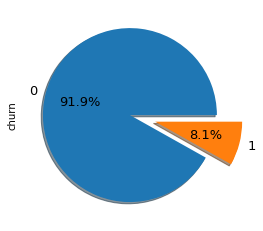

In [60]:
#checking the distribution of churn and non-churn
print(df_hvc.churn.value_counts(normalize=True)*100)
df_hvc.churn.value_counts().plot.pie(shadow=True, explode=(0, 0.3), startangle=0, autopct='%1.1f%%', fontsize=13)
plt.show()

From the above, we note that among the high value customers, there are approximately 92% non-churners while 8% churners.

Since we have already tagged churners, we have to remove all the attributes corresponding to the churn phase i.e. September month as the same would not be available to us while predicting the churn with our model.

In [61]:
#identifying the columns related to sepetember month
sep_cols = []

for i in df_hvc.columns:
    if i[-2:]=='_9':
        sep_cols.append(i)

for i in sep_cols:
    print(i)

arpu_9
onnet_mou_9
offnet_mou_9
roam_ic_mou_9
roam_og_mou_9
loc_og_t2t_mou_9
loc_og_t2m_mou_9
loc_og_t2f_mou_9
loc_og_t2c_mou_9
loc_og_mou_9
std_og_t2t_mou_9
std_og_t2m_mou_9
std_og_t2f_mou_9
std_og_mou_9
isd_og_mou_9
spl_og_mou_9
og_others_9
total_og_mou_9
loc_ic_t2t_mou_9
loc_ic_t2m_mou_9
loc_ic_t2f_mou_9
loc_ic_mou_9
std_ic_t2t_mou_9
std_ic_t2m_mou_9
std_ic_t2f_mou_9
std_ic_mou_9
total_ic_mou_9
spl_ic_mou_9
isd_ic_mou_9
ic_others_9
total_rech_num_9
total_rech_amt_9
max_rech_amt_9
date_of_last_rech_9
last_day_rch_amt_9
date_of_last_rech_data_9
total_rech_data_9
max_rech_data_9
count_rech_2g_9
count_rech_3g_9
av_rech_amt_data_9
vol_2g_mb_9
vol_3g_mb_9
arpu_3g_9
arpu_2g_9
night_pck_user_9
monthly_2g_9
sachet_2g_9
monthly_3g_9
sachet_3g_9
fb_user_9


In [62]:
#appending left out Sep month column
sep_cols.append('sep_vbc_3g')

In [63]:
#dropping the Sep month columns
df_hvc.drop(sep_cols, axis=1, inplace=True)

In [64]:
#check shape of dataframe
df_hvc.shape

(30001, 159)

## 4. Exploratory Data Analysis, Feature Engineering & Data Visualization 

In [65]:
#check the datatype of all the columns of df_hvc
df_hvc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 159 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   arpu_6                    float64
 2   arpu_7                    float64
 3   arpu_8                    float64
 4   onnet_mou_6               float64
 5   onnet_mou_7               float64
 6   onnet_mou_8               float64
 7   offnet_mou_6              float64
 8   offnet_mou_7              float64
 9   offnet_mou_8              float64
 10  roam_ic_mou_6             float64
 11  roam_ic_mou_7             float64
 12  roam_ic_mou_8             float64
 13  roam_og_mou_6             float64
 14  roam_og_mou_7             float64
 15  roam_og_mou_8             float64
 16  loc_og_t2t_mou_6          float64
 17  loc_og_t2t_mou_7          float64
 18  loc_og_t2t_mou_8          float64
 19  loc_og_t2m_mou_6          float64
 20  loc_og_t2m_mou_7          f

From the above, we notice that there are float, int and object type columns in our dataset. Let's bunch them by continuous and categorical types, for our further analysis. 

We noticed that columns `fb_user_6`, `fb_user_7`, `fb_user_8`, `night_pck_user_6`, `night_pck_user_7`, `night_pck_user_8` have been marked as float64 but are of categorical type. So let's deal with them accordingly. 

In [66]:
#continuous variables
cont_col = df_hvc.select_dtypes(['int64','float64']).columns    
cont_col = list( set(cont_col) - set(['fb_user_6', 'fb_user_7', 'fb_user_8', 
                                      'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']) )

#categorical variables
cat_col = set(df_hvc.select_dtypes(['object']).columns)  
cat_col.add('fb_user_6')
cat_col.add('fb_user_7')
cat_col.add('fb_user_8')
cat_col.add('night_pck_user_6')
cat_col.add('night_pck_user_7')
cat_col.add('night_pck_user_8')
cat_col = list(cat_col)


In [67]:
print('cont_col:', cont_col)

cont_col: ['loc_og_t2t_mou_6', 'isd_ic_mou_7', 'std_ic_t2f_mou_8', 'arpu_6', 'sachet_2g_6', 'jun_vbc_3g', 'arpu_8', 'std_ic_t2f_mou_7', 'total_rech_data_8', 'total_og_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'total_rech_amt_7', 'onnet_mou_8', 'loc_og_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_og_t2m_mou_8', 'total_rech_num_7', 'arpu_7', 'loc_ic_t2m_mou_6', 'offnet_mou_8', 'arpu_3g_6', 'og_others_7', 'sachet_2g_7', 'std_ic_t2m_mou_6', 'roam_og_mou_8', 'total_rech_num_8', 'last_day_rch_amt_6', 'spl_og_mou_6', 'max_rech_data_6', 'total_rech_num_6', 'last_day_rch_amt_8', 'count_rech_2g_8', 'std_og_t2t_mou_7', 'loc_ic_mou_6', 'std_og_mou_8', 'mobile_number', 'std_ic_t2t_mou_8', 'vol_2g_mb_8', 'max_rech_amt_8', 'std_ic_t2t_mou_7', 'count_rech_3g_6', 'vol_2g_mb_7', 'monthly_2g_6', 'vol_3g_mb_8', 'isd_ic_mou_6', 'total_rech_amt_8', 'roam_ic_mou_6', 'loc_og_t2c_mou_6', 'monthly_3g_7', 'aon', 'vol_3g_mb_7', 'loc_og_t2c_mou_7', 'roam_og_mou_7', 'std_og_t2m_mou_7', 'total_rech_data_7', 'offnet_mou_7', 'o

In [68]:
print('cat_col:', cat_col)

cat_col: ['fb_user_7', 'night_pck_user_8', 'date_of_last_rech_data_6', 'night_pck_user_7', 'date_of_last_rech_6', 'fb_user_6', 'date_of_last_rech_8', 'date_of_last_rech_data_7', 'night_pck_user_6', 'fb_user_8', 'date_of_last_rech_data_8', 'date_of_last_rech_7']


### 4.1 Categorical data

Let's check the categorical columns.

In [69]:
df_hvc[cat_col].head()

,fb_user_7,night_pck_user_8,date_of_last_rech_data_6,night_pck_user_7,date_of_last_rech_6,fb_user_6,date_of_last_rech_8,date_of_last_rech_data_7,night_pck_user_6,fb_user_8,date_of_last_rech_data_8,date_of_last_rech_7
0,1.0,0.0,6/21/2014,0.0,6/21/2014,1.0,8/8/2014,7/16/2014,0.0,1.0,8/8/2014,7/16/2014
7,0.0,0.0,0,0.0,6/27/2014,0.0,8/26/2014,0,0.0,0.0,0,7/25/2014
8,1.0,0.0,0,0.0,6/25/2014,0.0,8/30/2014,7/31/2014,0.0,1.0,8/23/2014,7/31/2014
21,0.0,0.0,0,0.0,6/30/2014,0.0,8/31/2014,0,0.0,0.0,0,7/31/2014
23,1.0,0.0,0,0.0,6/18/2014,0.0,8/24/2014,7/7/2014,0.0,1.0,8/6/2014,7/7/2014


All the certain categorical type columns are of datetime type, but not in correct format. The corresponding values are zero if customer has not recharged while some date values, if it is otherwise.

As a general intuition, we can figure that the last date of recharge during any particular month depends on date of joining of customer to telecom operator service. Hence their cycle varies from customer to customer. So we can definitely not judge the churn behaviour based on the day on which customer recharges. So let's get the derived matric out of the above six datetime columns. Let's impute 1 if the customer has recharged (for data or voice services) in a particular month, and 0 if not.

In [70]:
#fuction to impute the date columns, as mentioned above.
def date_impute(x):
    if x==0:
        return 0
    else:
        return 1
        
date_type = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
             'date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8']

for col in date_type:
    df_hvc[col] = df_hvc[col].apply(date_impute)

We have categorical column viz. `date_of_last_rech_6`	`date_of_last_rech_7`	`date_of_last_rech_8`	`date_of_last_rech_data_6`	`date_of_last_rech_data_7`	`date_of_last_rech_data_8`	`fb_user_6`	`fb_user_7`	`fb_user_8`, `night_pck_user_6`, `night_pck_user_7`, `night_pck_user_8`. Let's visualize the relation of categorical variables with the churn.

<Figure size 360x360 with 0 Axes>

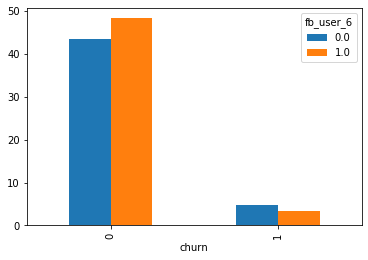

In [71]:
plt.figure(figsize=(5,5))
(pd.crosstab(df_hvc['churn'], df_hvc['fb_user_6'], normalize='all')*100).plot.bar()
plt.show()

<Figure size 360x360 with 0 Axes>

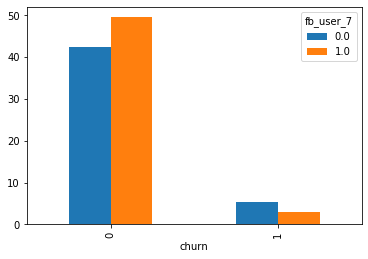

In [72]:
plt.figure(figsize=(5,5))
(pd.crosstab(df_hvc['churn'], df_hvc['fb_user_7'], normalize='all')*100).plot.bar()
plt.show()

<Figure size 360x360 with 0 Axes>

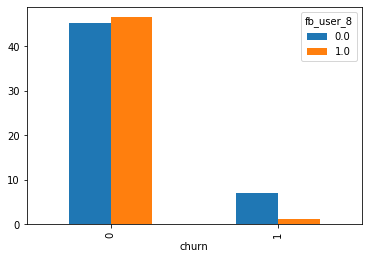

In [73]:
plt.figure(figsize=(5,5))
(pd.crosstab(df_hvc['churn'], df_hvc['fb_user_8'], normalize='all')*100).plot.bar()
plt.show()

From the above, we notice that customers who have tendency for churn tend to also use less social media websites such as **Facebook**. While on the other end, non-churn customers tend to use these services more often.

In [74]:
pd.crosstab(df_hvc['churn'],df_hvc['night_pck_user_6'], normalize='index')*100

night_pck_user_6,0.0,1.0
churn,,
0,98.661103,1.338897
1,98.443261,1.556739


In [75]:
pd.crosstab(df_hvc['churn'],df_hvc['night_pck_user_7'], normalize='index')*100

night_pck_user_7,0.0,1.0
churn,,
0,98.722787,1.277213
1,99.057763,0.942237


In [76]:
pd.crosstab(df_hvc['churn'],df_hvc['night_pck_user_8'], normalize='index')*100

night_pck_user_8,0.0,1.0
churn,,
0,98.795356,1.204644
1,99.631299,0.368701


From above, we notice that among churners, the nigh pack usage is low but not that signicantly low relative to non-churners, for all the phases.

In [77]:
pd.crosstab(df_hvc['churn'],df_hvc['date_of_last_rech_data_6'], normalize='index')*100

date_of_last_rech_data_6,0,1
churn,,
0,43.312772,56.687228
1,53.584596,46.415404


In [78]:
pd.crosstab(df_hvc['churn'],df_hvc['date_of_last_rech_data_7'], normalize='index')*100

date_of_last_rech_data_7,0,1
churn,,
0,41.574746,58.425254
1,60.876690,39.123310


In [79]:
pd.crosstab(df_hvc['churn'],df_hvc['date_of_last_rech_data_8'], normalize='index')*100

date_of_last_rech_data_8,0,1
churn,,
0,43.780842,56.219158
1,81.196231,18.803769


From the above two crosstables, we notice that for all the months in good and actions phases, churners tend not to recharge (date plan) while non-churner tend to recharge relatively more often.

In [80]:
(pd.crosstab(df_hvc['churn'],df_hvc['date_of_last_rech_6'], normalize='index')*100)

date_of_last_rech_6,0,1
churn,,
0,0.203193,99.796807
1,0.696436,99.303564


In [81]:
pd.crosstab(df_hvc['churn'],df_hvc['date_of_last_rech_7'], normalize='index')*100

date_of_last_rech_7,0,1
churn,,
0,0.163280,99.836720
1,2.171241,97.828759


In [82]:
pd.crosstab(df_hvc['churn'],df_hvc['date_of_last_rech_8'], normalize='index')*100

date_of_last_rech_8,0,1
churn,,
0,0.928882,99.071118
1,13.396149,86.603851


From the above, we notice that there is hike in percentage of customers who does not recharge (voice services) in action phase, amongst churners.

Let's get derived matrics such that for date columns, if a user has recharged during good phase and not during the action phase, we mark them as 1 and 0 otherwise. Likewise for fb_user column, if user has used such services during good phase and not during action phase, we mark them as 1 and 0 otherwise. We would not derive such matric for night pack data as the different does not seem significant.

In [83]:
#logic to obtain the columns as mentioned above

df_hvc['date_of_last_rech_'] = (df_hvc['date_of_last_rech_6'] | 
                                df_hvc['date_of_last_rech_7']) & (~ df_hvc['date_of_last_rech_8'])

df_hvc['date_of_last_rech_data_'] = (df_hvc['date_of_last_rech_data_6'] | 
                                     df_hvc['date_of_last_rech_data_7']) & (~ df_hvc['date_of_last_rech_data_6'])

df_hvc['fb_user_'] = (df_hvc['fb_user_6'].astype('int64') | 
                      df_hvc['fb_user_7'].astype('int64')) & (~ df_hvc['fb_user_8'].astype('int64'))


Let's visualize the relation of all the above three derived categorical features with the churn.

In [84]:
pd.crosstab(df_hvc.churn, df_hvc.date_of_last_rech_, normalize='index')*100

date_of_last_rech_,0,1
churn,,
0,99.071118,0.928882
1,86.603851,13.396149


In [85]:
pd.crosstab(df_hvc.churn, df_hvc.date_of_last_rech_data_, normalize='index')*100

date_of_last_rech_data_,0,1
churn,,
0,90.791001,9.208999
1,91.560836,8.439164


From above, we note that among churners, more percentage of customers (13.39%) tend to stop recharging for voice services in action phase as compared with non-churners (0.92%). The similar trend is not detected in data service.

In [86]:
pd.crosstab(df_hvc.churn, df_hvc.fb_user_, normalize='index')*100

fb_user_,0,1
churn,,
0,87.198839,12.801161
1,63.334699,36.665301


We note that more customers (36.66%) who churned, deliberately stopped using social media services during action phase, as compared with those (12.80%) who did not churn.

Let's utilise the three derived features as well, for our model.

### 4.2 Continuous data

Let's check the continuous columns.

In [87]:
df_hvc[cont_col].head()

,loc_og_t2t_mou_6,isd_ic_mou_7,std_ic_t2f_mou_8,arpu_6,sachet_2g_6,jun_vbc_3g,arpu_8,std_ic_t2f_mou_7,total_rech_data_8,total_og_mou_7,std_ic_mou_7,spl_ic_mou_7,total_rech_amt_7,onnet_mou_8,loc_og_t2m_mou_7,loc_ic_t2f_mou_6,loc_og_t2m_mou_8,total_rech_num_7,arpu_7,loc_ic_t2m_mou_6,offnet_mou_8,arpu_3g_6,og_others_7,sachet_2g_7,std_ic_t2m_mou_6,roam_og_mou_8,total_rech_num_8,last_day_rch_amt_6,spl_og_mou_6,max_rech_data_6,total_rech_num_6,last_day_rch_amt_8,count_rech_2g_8,std_og_t2t_mou_7,loc_ic_mou_6,std_og_mou_8,mobile_number,std_ic_t2t_mou_8,vol_2g_mb_8,max_rech_amt_8,std_ic_t2t_mou_7,count_rech_3g_6,vol_2g_mb_7,monthly_2g_6,vol_3g_mb_8,isd_ic_mou_6,total_rech_amt_8,roam_ic_mou_6,loc_og_t2c_mou_6,monthly_3g_7,aon,vol_3g_mb_7,loc_og_t2c_mou_7,roam_og_mou_7,std_og_t2m_mou_7,total_rech_data_7,offnet_mou_7,og_others_6,spl_og_mou_7,monthly_3g_6,arpu_2g_6,spl_ic_mou_6,std_og_t2m_mou_8,av_rech_amt_data_6,loc_ic_mou_8,last_day_rch_amt_7,loc_ic_mou_7,total_rech_data_6,loc_ic_t2t_mou_6,loc_og_t2m_mou_6,count_rech_2g_7,og_others_8,total_ic_mou_7,isd_og_mou_7,loc_ic_t2f_mou_8,std_og_t2f_mou_6,std_og_t2t_mou_8,spl_og_mou_8,isd_og_mou_6,monthly_2g_8,total_ic_mou_8,max_rech_data_7,count_rech_3g_7,sachet_2g_8,vol_2g_mb_6,aug_vbc_3g,max_rech_amt_6,churn,loc_og_t2f_mou_8,loc_og_mou_7,onnet_mou_7,roam_ic_mou_7,monthly_2g_7,std_og_t2f_mou_8,arpu_2g_8,sachet_3g_8,monthly_3g_8,isd_ic_mou_8,total_rech_amt_6,std_ic_t2f_mou_6,std_og_t2m_mou_6,loc_og_t2f_mou_6,total_ic_mou_6,loc_og_t2f_mou_7,onnet_mou_6,jul_vbc_3g,ic_others_7,roam_ic_mou_8,arpu_3g_8,spl_ic_mou_8,std_og_mou_7,std_og_t2t_mou_6,std_ic_mou_6,vol_3g_mb_6,loc_og_mou_8,loc_ic_t2f_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_7,loc_og_mou_6,loc_ic_t2m_mou_7,total_og_mou_8,loc_ic_t2m_mou_8,arpu_3g_7,loc_ic_t2t_mou_7,sachet_3g_6,std_ic_t2m_mou_7,std_ic_mou_8,std_ic_t2m_mou_8,ic_others_6,av_rech_amt_data_7,av_rech_amt_data_8,ic_others_8,offnet_mou_6,count_rech_2g_6,loc_og_t2c_mou_8,total_og_mou_6,max_rech_data_8,max_rech_amt_7,count_rech_3g_8,arpu_2g_7,sachet_3g_7,loc_ic_t2t_mou_8,std_og_mou_6,std_ic_t2t_mou_6,std_og_t2f_mou_7,roam_og_mou_6,isd_og_mou_8
0,0.00,0.00,0.00,197.385,0,101.20,213.803,0.00,1.0,0.00,0.00,0.0,252,0.00,0.00,0.00,0.00,3,214.816,0.00,0.00,212.17,0.0,0,0.00,0.00,2,252,0.0,252.0,4,252,0.0,0.00,0.00,0.00,7000842753,0.00,5.75,252,0.00,1.0,1.32,0,109.61,0.00,252,0.00,0.0,1,968,150.76,0.0,0.00,0.00,1.0,0.00,0.0,0.0,1,212.17,0.00,0.00,252.0,5.44,252,0.00,1.0,0.00,0.00,0.0,0.0,0.00,0.00,1.15,0.00,0.00,0.00,0.0,0,5.44,252.0,1.0,0,30.13,30.40,252,1,0.00,0.00,0.00,0.00,0,0.00,212.17,0,1,0.00,362,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,212.17,0.0,0.00,0.00,0.00,83.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.13,212.17,0.00,0,0.00,0.00,0.00,0.00,252.0,252.0,0.00,0.00,0.0,0.00,0.00,252.0,252,1.0,212.17,0,0.16,0.00,0.00,0.00,0.00,0.00
7,51.39,14.53,22.21,1069.180,0,18.74,3171.480,34.24,0.0,609.24,173.08,0.0,790,52.29,447.38,152.16,162.28,5,1349.850,217.56,325.91,0.00,0.0,0,91.44,38.06,7,0,4.5,0.0,5,779,0.0,23.29,427.88,77.84,7000701601,30.39,0.00,1580,11.83,0.0,0.00,0,0.00,2.06,3638,16.23,0.0,0,802,0.00,0.0,12.59,31.76,0.0,567.16,0.0,0.0,0,0.00,0.21,49.14,0.0,188.04,0,355.23,0.0,58.14,308.63,0.0,0.0,558.04,0.18,39.53,6.66,12.01,6.50,0.0,0,428.74,0.0,0.0,0,0.00,57.74,1580,1,53.23,533.91,54.68,33.49,0,16.68,0.00,0,0,31.59,1580,52.19,49.89,62.13,626.46,55.14,57.84,19.38,15.19,31.64,0.00,0.0,75.14,4.30,180.54,0.00,255.79,101.46,40.28,31.38,422.16,221.49,350.16,121.19,0.00,32.26,0,126.99,193.94,141.33,15.74,0.0,0.0,15.14,453.43,0.0,0.00,487.53,0.0,790,0.0,0.00,0,27.31,60.86,36.89,20.08,23.74,10.01
8,297.13,0.00,0.00,378.721,0,122.16,137.362,0.00,3.0,431.66,4.66,0.0,601,35.08,70.58,0.00,50.54,21,492.223,57.58,136.48,0.00,0.0,1,22.43,0.00,14,50,0.0,0.0,19,10,3.0,133.43,81.43,98.28,7001524846,0.10,0.03,30,0.58,0.0,356.00,0,11.94,0.00,120,0.00,0.0,0,315,750.95,0.0,0.00,10.04,2.0,80.63,0.0,0.0,0,0.00,0.00,75.69,0.0,15.79,0,23.83,0.0,23.84,80.96,2.0,0.0,28.49,0.00,0.00,0.00,22.58,10.23,0.0,0,16.54,154.0,0

We can drop `mobile_number`, as the same seems to be serving the purpose of identity only. 

In [88]:
df_hvc.drop(['mobile_number'], axis=1, inplace=True)

In [89]:
#removing mobile_number from cont_col
cont_col = set(cont_col)

cont_col.remove('mobile_number')

cont_col= list(cont_col)

As per the problem statement, we have months 6 (June) and 7 (July) as *The ‘good’ phase* while month 8 (August) as *The ‘action’ phase*. Let's check whether there is any significant difference amongst the averange statistics for the month of June & July as compared with the month of August.

For the purpose of statistical analysis, let's get the average values of different predictors for the month of **good phase** (i.e. June and July) and compare the same with the **actions phase** (i.e. August).

In [90]:
#bunching the diffrent continuous columns based on their months

cols_6_mon = []
cols_7_mon = []
cols_8_mon = []

for col in set(df_hvc.columns) - set(cat_col):
    if col[-1]=='6':
        cols_6_mon.append(col)
        
for col in set(df_hvc.columns) - set(cat_col):
    if col[-1]=='7':
        cols_7_mon.append(col)
        
for col in set(df_hvc.columns) - set(cat_col):
    if col[-1]=='8':
        cols_8_mon.append(col)
    
#sorting the columns
cols_6_mon = sorted(cols_6_mon)
cols_7_mon = sorted(cols_7_mon)
cols_8_mon = sorted(cols_8_mon)


In [91]:
desc = []
mean_6_7 = []

#getting the average values for the months of June and July and appending their means
for col6,col7 in zip(cols_6_mon,cols_7_mon):
    desc.append(col6[:-1])
    mean_6_7.append(((df_hvc[col6] + df_hvc[col7])/2).mean())
    

#appending the means of different columns of august
col8_val = []
for col8 in cols_8_mon:
    col8_val.append(df_hvc[col8].mean())


In [92]:
#preparing the dataframe to display the statistics for good phase and actions phase

monthly_stats_df = pd.DataFrame(data={'desc':desc,'mean_6_7':mean_6_7,'col8_val':col8_val})
monthly_stats_df['val_diff']= monthly_stats_df['col8_val'] - monthly_stats_df['mean_6_7']
monthly_stats_df['percentage_diff']=(monthly_stats_df['col8_val']-monthly_stats_df['mean_6_7']
                                    )/monthly_stats_df['mean_6_7']*100


avg_vbc_3g = ((df_hvc.jun_vbc_3g+df_hvc.jul_vbc_3g)/2).mean()
mean_aug_vbc_3g = df_hvc.aug_vbc_3g.mean()

monthly_stats_df = monthly_stats_df.append({'desc':'vbc_3g',
                                           'mean_6_7':avg_vbc_3g,
                                           'col8_val':mean_aug_vbc_3g,
                                           'val_diff':(mean_aug_vbc_3g-avg_vbc_3g),
                                           'percentage_diff':(mean_aug_vbc_3g-avg_vbc_3g)/avg_vbc_3g*100},
                                           ignore_index=True)

In [93]:
#display the statistics dataframe
monthly_stats_df.sort_values('percentage_diff', ascending=True)

,desc,mean_6_7,col8_val,val_diff,percentage_diff
24,og_others_,0.351998,0.057607,-0.294391,-83.634280
30,spl_ic_mou_,0.040400,0.026567,-0.013833,-34.239794
45,vol_2g_mb_,125.809755,105.913072,-19.896683,-15.814897
44,total_rech_num_,11.784924,9.972868,-1.812056,-15.376054
27,roam_og_mou_,23.361816,19.865615,-3.496201,-14.965451
38,std_og_t2m_mou_,183.677078,157.350068,-26.327010,-14.333313
21,monthly_2g_,0.178877,0.153628,-0.025249,-14.115345
36,std_og_mou_,355.555232,307.379315,-48.175917,-13.549489
26,roam_ic_mou_,14.376429,12.500551,-1.875878,-13.048288
39,std_og_t2t_mou_,170.059634,148.441175,-21.618459,-12.712281


From the above, we notice that majority of services has comsumption reduced in action phase as compared to good phase. 

In [94]:
#columns with reduction in usage
reduction_cols = monthly_stats_df[monthly_stats_df.percentage_diff < 0].desc.values

These difference columns may be pivotal for our model building as the same might indicate churn. So, let's get the derived matrix out of these columns by getting the difference and use them as predictor for our model building.

In [95]:
#deriving the difference columns between good and actions phase for reduction_cols

for col in reduction_cols:
    name='diff_'+col
    col_june = col+'6'
    col_july = col+'7'
    col_aug = col+'8'
    df_hvc[name] = df_hvc[col_aug] - ((df_hvc[col_june]+df_hvc[col_july])/2) 

In [96]:
#check the shape of df_hvc now
df_hvc.shape

(30001, 207)

In [97]:
#check the head of df_hvc
df_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,date_of_last_rech_,date_of_last_rech_data_,fb_user_,diff_arpu_2g_,diff_arpu_3g_,diff_arpu_,diff_av_rech_amt_data_,diff_count_rech_2g_,diff_count_rech_3g_,diff_ic_others_,diff_isd_ic_mou_,diff_isd_og_mou_,diff_last_day_rch_amt_,diff_loc_ic_mou_,diff_loc_ic_t2f_mou_,diff_loc_ic_t2m_mou_,diff_loc_ic_t2t_mou_,diff_loc_og_mou_,diff_loc_og_t2c_mou_,diff_loc_og_t2f_mou_,diff_loc_og_t2m_mou_,diff_loc_og_t2t_mou_,diff_max_rech_amt_,diff_max_rech_data_,diff_monthly_2g_,diff_monthly_3g_,diff_offnet_mou_,diff_og_others_,diff_onnet_mou_,diff_roam_ic_mou_,diff_roam_og_mou_,diff_sachet_2g_,diff_sachet_3g_,diff_spl_ic_mou_,diff_std_ic_mou_,diff_std_ic_t2f_mou_,diff_std_ic_t2m_mou_,diff_std_ic_t2t_mou_,diff_std_og_mou_,diff_std_og_t2f_mou_,diff_std_og_t2m_mou_,diff_std_og_t2t_mou_,diff_total_ic_mou_,diff_total_og_mou_,diff_total_rech_amt_,diff_total_rech_data_,diff_total_rech_num_,diff_vol_2g_mb_,diff_vol_3g_mb_
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,1,1,1,252,252,252,1,1,1,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1,0,0,0,0.00,0.000,7.7025,0.0,0.0,0.0,0.000,0.00

Now let's checkout the correlation of all the continuous predictors with the target variable i.e. Churn and hence find the top negatively correlated predictors. 

In [98]:
corr_df = round(df_hvc[list(set(df_hvc.columns) - set(cat_col))].corr().churn.sort_values(ascending=False)*100, 3)

corr_df[corr_df.values<-10]

loc_ic_mou_7             -10.009
diff_count_rech_2g_      -10.019
count_rech_2g_8          -10.739
aon                      -10.828
diff_av_rech_amt_data_   -11.026
diff_loc_og_t2m_mou_     -11.488
last_day_rch_amt_8       -11.626
diff_max_rech_data_      -11.682
diff_total_rech_data_    -11.895
total_rech_data_8        -11.989
offnet_mou_8             -12.152
diff_loc_og_mou_         -12.238
max_rech_amt_8           -12.848
max_rech_data_8          -13.552
av_rech_amt_data_8       -13.746
diff_loc_ic_t2m_mou_     -13.785
total_og_mou_8           -14.544
diff_max_rech_amt_       -15.152
diff_loc_ic_mou_         -15.174
total_rech_num_8         -15.190
loc_og_t2m_mou_8         -15.247
loc_og_mou_8             -15.259
arpu_8                   -16.091
loc_ic_t2m_mou_8         -16.113
total_rech_amt_8         -16.127
diff_std_og_t2t_mou_     -17.114
loc_ic_mou_8             -17.239
diff_total_ic_mou_       -17.476
diff_std_og_t2m_mou_     -17.663
total_ic_mou_8           -17.838
diff_onnet

Let's plot them with respect to chrun, so as to visualize them better.

In [99]:
#bunching the top negatively correlated (with churn) columns 
neg_corr_pre = list(corr_df[corr_df.values<-10].index)
neg_corr_pre

['loc_ic_mou_7',
 'diff_count_rech_2g_',
 'count_rech_2g_8',
 'aon',
 'diff_av_rech_amt_data_',
 'diff_loc_og_t2m_mou_',
 'last_day_rch_amt_8',
 'diff_max_rech_data_',
 'diff_total_rech_data_',
 'total_rech_data_8',
 'offnet_mou_8',
 'diff_loc_og_mou_',
 'max_rech_amt_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'diff_loc_ic_t2m_mou_',
 'total_og_mou_8',
 'diff_max_rech_amt_',
 'diff_loc_ic_mou_',
 'total_rech_num_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'arpu_8',
 'loc_ic_t2m_mou_8',
 'total_rech_amt_8',
 'diff_std_og_t2t_mou_',
 'loc_ic_mou_8',
 'diff_total_ic_mou_',
 'diff_std_og_t2m_mou_',
 'total_ic_mou_8',
 'diff_onnet_mou_',
 'diff_offnet_mou_',
 'diff_std_og_mou_',
 'diff_total_rech_num_',
 'diff_total_og_mou_',
 'diff_total_rech_amt_',
 'diff_arpu_']

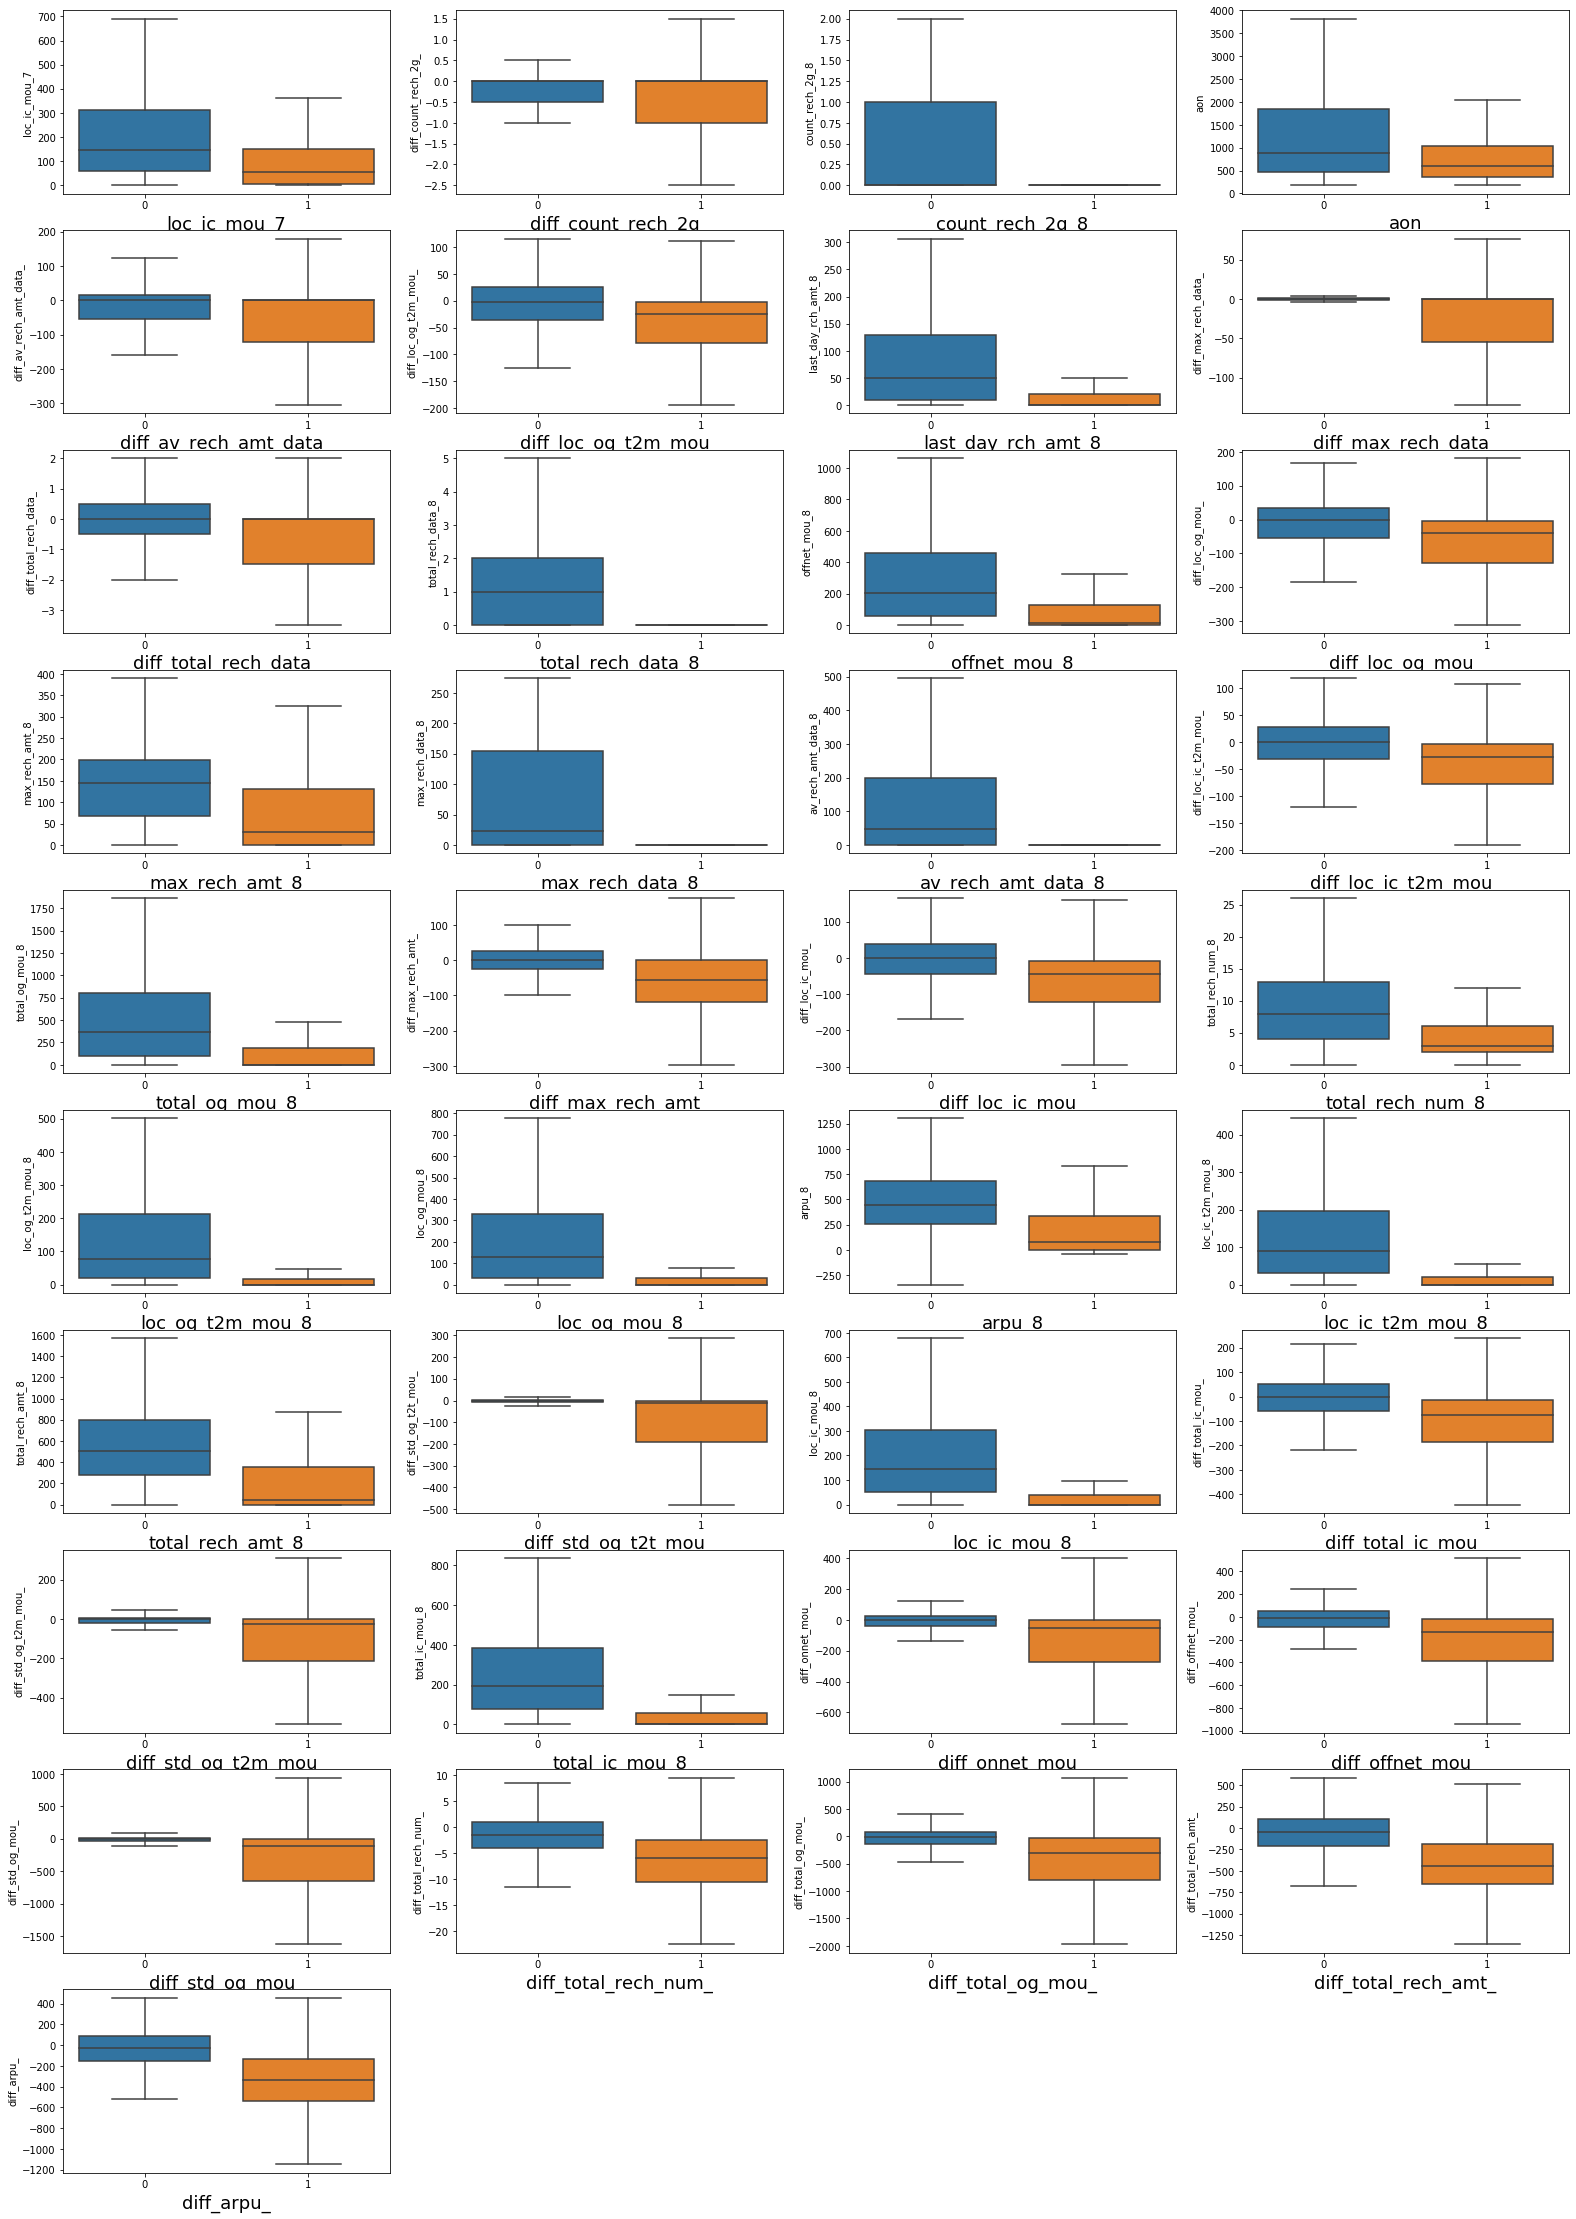

In [100]:
#plotting the continuous negatively correlated columns

plt.figure(figsize=(27,60))
for m,n in enumerate(neg_corr_pre):
    plt.subplot(15,4,(m+1))
    sns.boxplot(df_hvc['churn'], df_hvc[n], showfliers=False)   #put showfliers=False to remove outliers from plot
    plt.xlabel(n,fontsize=18)
plt.show()

From the above, we note that in case of high negatively correlated variables, the median values in case of churn is lower as compared to non-churn cases. Ths same is intuitive as we note the significant reduction in the usage of different service during the action month (i.e. August) as compared to good months.

Let's check the churn rate for different `AON` i.e. Age on network - number of days the customer is using the operator T network.

In [101]:
df_hvc.aon.describe()

count    30001.000000
mean     1209.368754 
std      957.677989  
min      180.000000  
25%      460.000000  
50%      846.000000  
75%      1756.000000 
max      4321.000000 
Name: aon, dtype: float64

Let's group this column into different categories, for ease of analysis.

In [102]:
df_hvc['grouped_aon'] = pd.cut(df_hvc['aon'],[180,460,846,1756,4321], labels=['L','ML','MH','H'])
df_hvc['grouped_aon'].value_counts()

MH    7500
H     7499
L     7499
ML    7488
Name: grouped_aon, dtype: int64

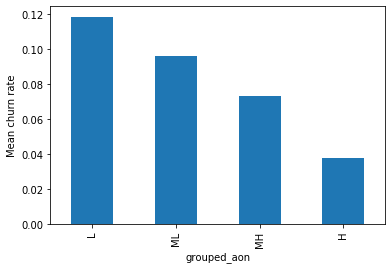

In [103]:
df_hvc.groupby('grouped_aon').churn.mean().plot.bar()
plt.ylabel('Mean churn rate')
plt.show()

df_hvc.drop('grouped_aon', axis=1, inplace=True)

From the above, we note that amongst high value customers, as their age as a user in network T increases, the mean churn rate decreases.

Let's check out the volume based cost (**VBC**) for different phases (**good** and **action**) for both churners and non-churners.

In [104]:
df_hvc['VBC_june_july_avg'] = (df_hvc.jun_vbc_3g + df_hvc.jul_vbc_3g)/2

count    30001.000000
mean     168.698363  
std      392.776395  
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      158.000000  
max      8190.585000 
Name: VBC_june_july_avg, dtype: float64


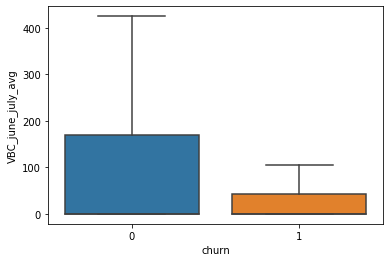

In [105]:
print(df_hvc['VBC_june_july_avg'].describe())

sns.boxplot(x=df_hvc.churn, y=df_hvc.VBC_june_july_avg, showfliers=False)
plt.show()

count    30001.000000
mean     169.138860  
std      420.974354  
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      128.800000  
max      12916.220000
Name: aug_vbc_3g, dtype: float64


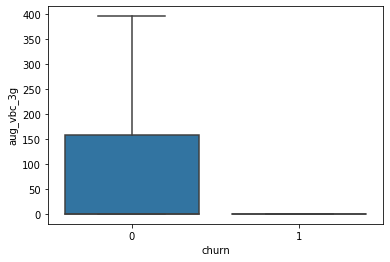

In [106]:
print(df_hvc['aug_vbc_3g'].describe())

sns.boxplot(x=df_hvc.churn, y=df_hvc.aug_vbc_3g, showfliers=False)
plt.show()

From the above, we notice that VBC i.e. volume based cost are less for churners for both good as well as action phase. Especially in action phase, the VBC has reduced down to almost zero for churners.
Let's keep `VBC_june_july_avg` as the same seems an important indicator of churn.

Let's get the difference between the `VBC_june_july_avg` and `aug_vbc_3g` and plot the same agianst churn.

In [107]:
df_hvc.diff_vbc = df_hvc.aug_vbc_3g - df_hvc.VBC_june_july_avg 

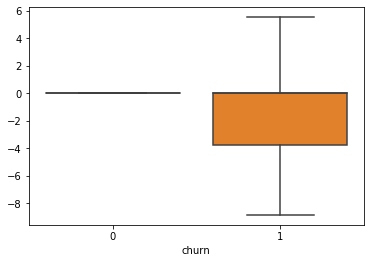

In [108]:
sns.boxplot(x=df_hvc.churn, y=df_hvc.diff_vbc, showfliers=False)

From the above, we note that there is reduction in volume based cost in action phase as compared with the good phase.

### 4.3 Summary insights after EDA:

1. There are total two kinds of missing values:
    - One where customers have not used voice/data as they have not recharged for voice/data for the correspondig months.
    - Second where customers have deliberately not used voice/data even after recharging for voice/data for the corresponding months.
2. Churn rate is relatively high amongst customers who have deliberately not used services even after recharging for the same, which shows their dissatisfaction towards network.
3. As the customers starts to reduce their sevice usage from Good phase to Action phase, the likelihood of churn increases. The same is visible from the box plot of various continuous negatively correlated derived variables above.
4. Tendency of data/ voice recharge also decreases from Good phase to Action phase, amongst churners.
5. Churners tend to use relatively less social media websites (such as Facebook, etc.) from Good phase to Action phase.
6. Old customers tend to churn less as compared with new customers.
7. There is significant reduction in usage of volume based cost (VBC) services amongst churners, while the same trend is not noticed amongst non-churners.

## 5. Data Preparation

### 5.1 Seperating X and y

In [109]:
y = df_hvc.churn
X = df_hvc.drop('churn', axis=1)

In [110]:
print(X.shape, y.shape)

(30001, 207) (30001,)


### 5.2 Handling the class imbalance

Let's check the percentage of churn left in our final cleaned dataset.

In [111]:
y.value_counts(normalize=True)*100

0    91.863605
1    8.136395 
Name: churn, dtype: float64

From the above, we notice that in our final prepared data, we have only **8.13%** of churn while **91.86%** non-churn. Hence our dataset is highly imbalanced. We need to take care of this imbalance since otherwise dimentionalitiy reduction like PCA might eliminate those dimentions, which may be the indicators of minority class i.e. churn here. 

Let's use **SMOTE** i.e. Synthetic Minority Oversampling Technique to handle such situation. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

courtesy: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [112]:
#using SMOTE to oversample the dataset properly

smote = SMOTE(random_state=1)

X_sm, y_sm = smote.fit_sample(X=X, y=y)

In [113]:
#check the shape of X_sm
X_sm.shape

(55120, 207)

In [114]:
#check the shape of y_sm
y_sm.shape

(55120,)

In [115]:
#check the percantage value counts of churn
y_sm.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: churn, dtype: float64

From above, we notice that both the classed have become perfectly balanced now. So now we can fearlessly apply dimentionality reduction technique i.e. PCA to our dataset.

### 5.3 Train-Test split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3)  

### 5.4 Scalling the X

In [117]:
#use MinMaxScaler is scale the predictors (X)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#converting array into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [118]:
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,date_of_last_rech_,date_of_last_rech_data_,fb_user_,diff_arpu_2g_,diff_arpu_3g_,diff_arpu_,diff_av_rech_amt_data_,diff_count_rech_2g_,diff_count_rech_3g_,diff_ic_others_,diff_isd_ic_mou_,diff_isd_og_mou_,diff_last_day_rch_amt_,diff_loc_ic_mou_,diff_loc_ic_t2f_mou_,diff_loc_ic_t2m_mou_,diff_loc_ic_t2t_mou_,diff_loc_og_mou_,diff_loc_og_t2c_mou_,diff_loc_og_t2f_mou_,diff_loc_og_t2m_mou_,diff_loc_og_t2t_mou_,diff_max_rech_amt_,diff_max_rech_data_,diff_monthly_2g_,diff_monthly_3g_,diff_offnet_mou_,diff_og_others_,diff_onnet_mou_,diff_roam_ic_mou_,diff_roam_og_mou_,diff_sachet_2g_,diff_sachet_3g_,diff_spl_ic_mou_,diff_std_ic_mou_,diff_std_ic_t2f_mou_,diff_std_ic_t2m_mou_,diff_std_ic_t2t_mou_,diff_std_og_mou_,diff_std_og_t2f_mou_,diff_std_og_t2m_mou_,diff_std_og_t2t_mou_,diff_total_ic_mou_,diff_total_og_mou_,diff_total_rech_amt_,diff_total_rech_data_,diff_total_rech_num_,diff_vol_2g_mb_,diff_vol_3g_mb_,VBC_june_july_avg
0,0.087136,0.069110,0.027494,0.069166,0.070038,0.000166,0.033507,0.041449,0.000085,0.000000,0.00000,0.000058,0.000000,0.000000,0.000163,0.003581,0.003447,0.000009,0.030934,0.038696,0.000045,0.016571,0.002938,0.000020,0.031075,0.025461,0.000000,0.017205,0.026202,0.000029,0.066133,0.067142,0.000162,0.011188,0.022986,0.000035,0.000000,0.000000,0.000000,0.068803,0.066758,0.000128,0.0,0.0,0.000000,0.027438,0.009234,0.000000,0.000000,0.0,0.0,0.074144,0.082963,0.000150,0.004629,0.004088,0.000016,0.015891,0.026788,0.000066,0.005983,0.001157,0.000000,0.015300,0.021140,0.000066,0.008567,0.013128,7.626837e-08,0.014388,0.156332,0.000007,0.000000,0.000723,0.0,0.018093,0.091838,0.000007,0.028393,0.108826,0.000064,0.000000,0.0,0.0,0.000919,0.011908,0.000000,0.000000

In [119]:
X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,date_of_last_rech_,date_of_last_rech_data_,fb_user_,diff_arpu_2g_,diff_arpu_3g_,diff_arpu_,diff_av_rech_amt_data_,diff_count_rech_2g_,diff_count_rech_3g_,diff_ic_others_,diff_isd_ic_mou_,diff_isd_og_mou_,diff_last_day_rch_amt_,diff_loc_ic_mou_,diff_loc_ic_t2f_mou_,diff_loc_ic_t2m_mou_,diff_loc_ic_t2t_mou_,diff_loc_og_mou_,diff_loc_og_t2c_mou_,diff_loc_og_t2f_mou_,diff_loc_og_t2m_mou_,diff_loc_og_t2t_mou_,diff_max_rech_amt_,diff_max_rech_data_,diff_monthly_2g_,diff_monthly_3g_,diff_offnet_mou_,diff_og_others_,diff_onnet_mou_,diff_roam_ic_mou_,diff_roam_og_mou_,diff_sachet_2g_,diff_sachet_3g_,diff_spl_ic_mou_,diff_std_ic_mou_,diff_std_ic_t2f_mou_,diff_std_ic_t2m_mou_,diff_std_ic_t2t_mou_,diff_std_og_mou_,diff_std_og_t2f_mou_,diff_std_og_t2m_mou_,diff_std_og_t2t_mou_,diff_total_ic_mou_,diff_total_og_mou_,diff_total_rech_amt_,diff_total_rech_data_,diff_total_rech_num_,diff_vol_2g_mb_,diff_vol_3g_mb_,VBC_june_july_avg
0,0.094511,0.076075,0.035451,0.007124,0.007184,0.001431,0.054791,0.047592,0.008216,0.023557,0.013026,0.007125,0.060575,0.054447,0.010229,0.001475,0.002131,0.000178,0.007249,0.006111,0.000653,0.000685,0.000077,0.0,0.000000,0.0,0.001583,0.004167,0.005615,0.000441,0.002922,0.002834,0.001152,0.025997,0.032060,0.004526,0.0,0.0,0.0,0.028186,0.029212,0.005177,0.0,0.0,0.0,0.000247,0.000595,0.000257,0.000922,0.0,0.0,0.026500,0.031969,0.005519,0.000533,0.002076,0.000256,0.006553,0.006972,0.000873,0.000120,0.000694,0.000171,0.004608,0.006481,0.000957,0.000298,0.000792,0.000000,0.013606,0.012168,0.007387,0.000047,0.0,0.000000,0.009316,0.006942,0.007287,0.011045,0.011939,0.006420,0.000000,0.007161,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.032573,0.072464,0.0204

### 5.5 Dimentionality reduction using PCA

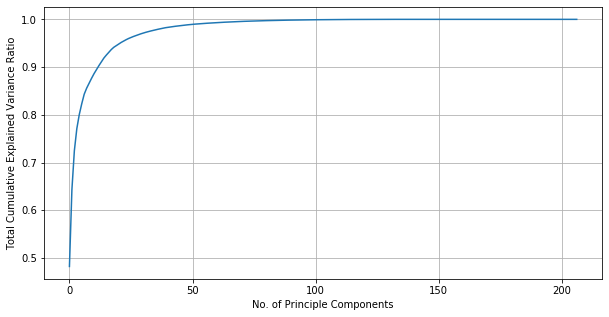

In [120]:
#use principal component analysis (PCA) for dimentionality reduction

pca = PCA(random_state=100)
pca.fit(X_train_scaled)
var_cumu = np.cumsum(pca.explained_variance_ratio_)


#plotting different variance for chosen no. of principle components

plt.figure(figsize=(10,5))    
plt.plot(var_cumu)
plt.xlabel('No. of Principle Components')
plt.ylabel('Total Cumulative Explained Variance Ratio')
plt.grid()
plt.show()


In [121]:
#check cumulative variance explained by top 25 principle components 
var_cumu[25-1]

0.9598669231171647

From the above, we note that after **25**, the total explained variance ratio seems to flatten. Hence we should go ahead with those PCs only.

In [122]:
#using top PCs for data preparation for our model
pc2 = PCA(25, random_state=100)

In [123]:
new_train_data = pc2.fit_transform(X_train_scaled)
new_test_data = pc2.transform(X_test_scaled)

In [124]:
pc_cols = []
for i in range(25):
    pc_cols.append('PC'+str(i))

In [125]:
X_train_pca = pd.DataFrame(new_train_data, columns=pc_cols)
X_test_pca = pd.DataFrame(new_test_data, columns=pc_cols)

In [126]:
X_train_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,-0.163098,0.192554,0.083113,-0.104479,-0.546051,0.503059,-0.621904,0.252761,0.239593,0.205801,0.094554,-0.180637,-0.084319,0.022739,0.218520,0.122098,0.185910,-0.392243,0.033992,0.019586,0.006829,-0.086255,-0.140638,-0.009606,0.002005
1,-1.004537,-0.209525,-0.012546,-0.136882,0.052720,0.265707,-0.008186,0.097363,-0.047292,-0.094237,0.005329,0.324855,-0.226831,0.314418,-0.075521,-0.029672,0.057539,0.011617,-0.069560,0.026058,0.030459,-0.015055,-0.021380,0.050901,-0.062127
2,0.868464,0.372020,0.165164,-0.186161,-0.615253,0.065556,0.185418,-0.128717,-0.195286,0.330292,0.156287,0.345517,0.440653,0.074323,-0.004188,0.092529,-0.057917,-0.130528,0.055346,-0.043267,-0.030513,0.153527,0.020156,-0.009133,-0.021811
3,-1.069193,0.139745,-0.188342,1.055810,-0.032124,0.086976,0.188895,0.089392,-0.044980,-0.302367,0.560260,0.268083,-0.175927,-0.120229,0.064560,0.117611,-0.052180,0.024889,-0.174524,0.007739,0.030374,-0.004027,0.008826,0.265374,-0.255523
4,-0.998481,-0.166396,-0.001647,-0.114699,-0.093836,-0.082635,0.006897,-0.208422,0.072827,-0.078771,-0.013395,0.043928,0.023288,-0.011794,0.009540,0.003415,-0.026544,0.000107,0.000181,0.003226,-0.017973,0.003060,-0.001774,-0.013264,-0.025371


In [127]:
X_train_pca.shape

(38584, 25)

In [128]:
y_train.shape

(38584,)

In [129]:
X_test_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,-0.949071,-0.165067,0.050845,-0.104232,-0.140247,-0.064837,-0.025207,-0.152772,0.082632,-0.087728,-0.009392,0.016102,0.032504,-0.025165,-0.033990,0.050818,-0.027942,-0.025817,0.009613,0.001635,-0.025132,0.005210,0.010848,0.006188,0.008752
1,1.491424,-0.316825,-0.149708,0.014399,-0.128368,-0.090505,0.051211,-0.072207,0.225900,0.162856,0.065641,-0.094476,-0.152918,-0.012427,-0.000599,-0.005597,-0.062602,-0.017906,0.001370,0.156549,0.069687,-0.330661,-0.303804,0.098530,0.055126
2,0.755886,1.380023,0.322837,0.560452,-0.122834,0.056347,0.152185,0.077491,-0.031464,-0.073563,-0.335475,0.104895,0.263577,-0.066392,0.015843,0.044086,0.258895,0.115828,0.028761,0.128631,0.019448,-0.000687,0.071182,-0.134028,-0.080643
3,-1.015889,-0.190998,-0.005759,-0.140340,-0.061883,-0.041184,0.036302,0.030031,-0.020116,-0.013087,0.017838,-0.000771,0.002132,-0.006356,-0.017522,-0.009029,0.001492,0.023794,0.077078,-0.005029,-0.026696,-0.007347,0.004145,-0.007654,0.004857
4,-1.016702,-0.178211,-0.004260,-0.129529,-0.106274,-0.134357,0.040111,-0.015286,-0.013800,-0.032338,0.006328,-0.025088,0.033593,-0.043449,-0.001355,-0.062726,-0.005929,-0.014170,-0.024488,-0.001760,0.000850,0.000917,-0.003285,-0.008867,0.006885


In [130]:
X_test_pca.shape

(16536, 25)

In [131]:
y_test.shape

(16536,)

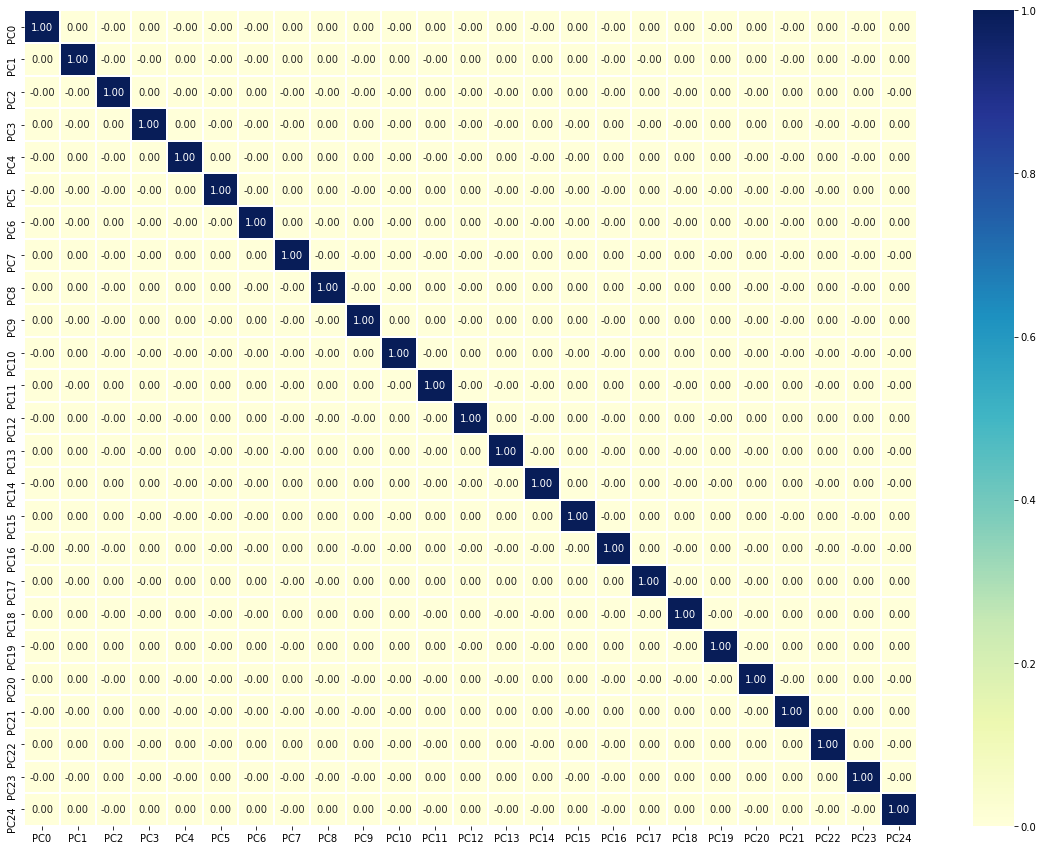

In [132]:
#correlation check for different PCs
plt.figure(figsize=(20,15))
sns.heatmap(X_train_pca.corr(),annot = True, cmap="YlGnBu",linewidth =1, fmt='.2f')
plt.show()

Hence we have got good PCs with almost zero correlation amongst them.

## 6. Model building (I): Churn prediction

Here, our 1st aim is churn classification. Target is to classifiy all the churners more accurately. We know that Recall/ Sensitivity is given by,

$Recall = Sensitivity = TP / (TP + FN)$. 

So False Negatives (FN) should be as low as possible. For the same, our Recall score (Sensitivity) should be as high as possible. Hence Recall score should be our metric of focus for comparison of different ML models.

Let's use the following ML techniques with PCA for our classification task:
1. Logistic Regression
2. Random Forrest
3. XGBoost

We would initially run the above models on all the default parameters and check the Recall score and subsequently tune the corresponding hyperparameters and then check the Recall score again on the best obtained set of hyperparameters.

### 6.1 Logistics Regression with PCA:

#### 6.1.1 Model with default hyperparameters

In [133]:
lrm = LogisticRegression()

lrm.fit(X_train_pca, y_train)

#print the classification report
print(classification_report(y_test, lrm.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, lrm.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      8353
           1       0.84      0.84      0.84      8183

    accuracy                           0.84     16536
   macro avg       0.84      0.84      0.84     16536
weighted avg       0.84      0.84      0.84     16536

ROC score: 0.8394984073685334


#### 6.1.2 Tuning the hyperparameters 

Let's use l2 regularizations along with tuning of C hyperpameter using RandomizedSearchCV and find the best set of hyprparameters for the given problem.

Let's tune the hyperparameters in the following fashion:

- 'penalty': Used to specify the norm used in the penalization i.e. l1 or l2 regularization. Let's keep it [l2]
- 'C': Inverse of regularization strength. Let's keep it [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [134]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
# Create a based model
lr_model = LogisticRegression()

# Instantiate the grid search model
lr_model_random_search = RandomizedSearchCV(estimator = lr_model, param_distributions = param_grid, scoring= 'recall', 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True, n_iter=15)

lr_model_random_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l2']},
                   return_train_score=True, scoring='recall', verbose=1)

In [135]:
lr_model_random_search.best_estimator_

LogisticRegression(C=0.001)

In [136]:
#saving the CV results into an object
cv_results= pd.DataFrame(lr_model_random_search.cv_results_)

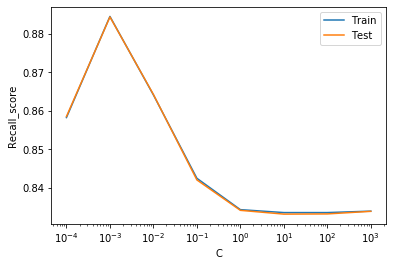

In [137]:
#plotting R2 score vs alpha value
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], label='Test')
plt.xlabel('C')
plt.ylabel('Recall_score')
plt.xscale('log')
plt.legend()
plt.show()

Let's check C=0.001 and C=0.01 along with l2 regularization. Let's use them and build our final model for logistic regression.

In [138]:
lrm_final = LogisticRegression(penalty='l2', C=0.01)

lrm_final.fit(X_train_pca, y_train)

#print the classification report
print(classification_report(y_test, lrm_final.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, lrm_final.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81      8353
           1       0.78      0.86      0.82      8183

    accuracy                           0.81     16536
   macro avg       0.82      0.81      0.81     16536
weighted avg       0.82      0.81      0.81     16536

ROC score: 0.8140751824228365


In [139]:
lrm_final = LogisticRegression(penalty='l2', C=0.001)

lrm_final.fit(X_train_pca, y_train)

#print the classification report
print(classification_report(y_test, lrm_final.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, lrm_final.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71      8353
           1       0.69      0.89      0.78      8183

    accuracy                           0.75     16536
   macro avg       0.77      0.75      0.74     16536
weighted avg       0.77      0.75      0.74     16536

ROC score: 0.7501178557965295


We notice that C=0.001 is increasing recall but reducing ROC score. So from above, we have got C=0.01 as the best value of hyperparameter for logistic regression with l2 regularization.

### 6.2 Random Forest with PCA

#### 6.2.1 Model with default hyperparameters

In [140]:
rfcm = RandomForestClassifier()

rfcm.fit(X_train_pca, y_train)

print(classification_report(y_test, rfcm.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, rfcm.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8353
           1       0.94      0.94      0.94      8183

    accuracy                           0.94     16536
   macro avg       0.94      0.94      0.94     16536
weighted avg       0.94      0.94      0.94     16536

ROC score: 0.9433403329696359


#### 6.2.2 Tuning the hyperparameters 

Let's tune the hyperparameters in the following fashion:

- 'max_depth': The maximum depth of the tree. Let's keep it [12,18]
- 'n_estimators': The number of trees in the forest. Let's keep it [100],
- 'max_features': The number of features to consider when looking for the best split. Let's keept it as total no. of predictors i.e. [X_train_pca.shape[1]],
- 'min_samples_leaf': The minimum number of samples required to be at a leaf node.Let's keep it as [10,20],
- 'min_samples_split': The minimum number of samples required to split an internal node. Let's keep it as [10,20,30]

In [141]:
# Create the parameter grid based on the results of random search 
#param_grid = {
#    'max_depth': [12,18],
#    'n_estimators': [100],
#    'max_features': [X_train_pca.shape[1]],
#    'min_samples_leaf': [10,20],
#    'min_samples_split': [10,20,30]
#}
# Create a based model
#rf_model = RandomForestClassifier()

# Instantiate the grid search model
#rf_random_search = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, scoring= 'recall', 
 #                         cv = 5, n_jobs = -1,verbose = 1,return_train_score=True, n_iter=10)

#rf_random_search.fit(X_train_pca, y_train)

#rf_random_search.best_estimator_

*The above code has been hashed out as it is time consuming. The same was ran on Google colab and the results obtained has been reproduced below.*

Upon running the above code, the best values of hyperparameters obtained as as under:
- max_depth= 18
- n_estimators= 100 
- max_features= 25
- min_samples_leaf= 10
- min_samples_split= 10

In [142]:
#running the model on best obtained set of hyperparameters
rfcm = RandomForestClassifier(max_depth= 18, n_estimators= 100, max_features= 25, 
                              min_samples_leaf= 10, min_samples_split= 10)

rfcm.fit(X_train_pca, y_train)

print(classification_report(y_test, rfcm.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, rfcm.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      8353
           1       0.93      0.91      0.92      8183

    accuracy                           0.92     16536
   macro avg       0.92      0.92      0.92     16536
weighted avg       0.92      0.92      0.92     16536

ROC score: 0.9194227201221712


###  6.3 XGBoost

#### 6.3.1 Model with default hyperparameters

In [143]:
xgbm = XGBClassifier()
xgbm.fit(X_train_pca, y_train)

print(classification_report(y_test, xgbm.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, xgbm.predict(X_test_pca)))

[19:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      8353
           1       0.92      0.92      0.92      8183

    accuracy                           0.92     16536
   macro avg       0.92      0.92      0.92     16536
weighted avg       0.92      0.92      0.92     16536

ROC score: 0.9223842315052277


#### 6.3.2 Tuning the hyperparameters

Let's tune the hyperparameters in the following fashion:

- 'learning_rate': It is the rate at which model learns. Let's keep it [0.1,0.2,0.3]
- 'subsample': Subsample ratio of the training instances. Let's keep it [0.3,0.4,0.5],


In [144]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
#folds = 5

# specify range of hyperparameters
#param_grid = {'learning_rate': [0.1,0.2,0.3], 
 #            'subsample': [0.3,0.4,0.5]}          


# specify model
#xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
#model_cv = RandomizedSearchCV(estimator = xgb_model, 
      #                  param_distributions = param_grid, 
     #                   scoring= 'recall', 
    #                    cv = folds, 
   #                     n_jobs = -1,
  #                      verbose = 1,
 #                       return_train_score=True, n_iter=10)      

#model_cv.fit(X_train_pca, y_train)

#model_cv.best_estimator_

*The above code has been hashed out as it is time consuming. The same was ran on Google colab and the results obtained has been reproduced below.*

Upon running the above code, the best values of hyperparameters obtained as as under:
- learning_rate=0.3
- subsample=0.5

In [145]:
#running the model on the best obtained set of hyperparameters
xgbm = XGBClassifier(learning_rate=0.3, subsample=0.5)
xgbm.fit(X_train_pca, y_train)

print(classification_report(y_test, xgbm.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, xgbm.predict(X_test_pca)))

[19:22:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8353
           1       0.92      0.91      0.92      8183

    accuracy                           0.92     16536
   macro avg       0.92      0.92      0.92     16536
weighted avg       0.92      0.92      0.92     16536

ROC score: 0.9181344296798429


### 6.4 Conclusion:

- Upon running the above models and tunining the corresponding hyperparameters, we note that hyperparameter tuning does not result in any significant imporvement in the performance of the model when we consider Recall and ROR as the metric of measurement. 
- The summary of different models and the corresponding obtained performance metrics values are as under:

| Model name | Hyperparameter tuning | Recall | ROC score |
| --- | --- | --- | --- |
| Logistic Regression | Before | 0.83 | 0.83 |
| Logistic Regression | After | 0.86 | 0.80 |
| Random Forest | Before | 0.94 | 0.94 |
| Random Forest | After | 0.91| 0.91 |
| XGBoost | Before | 0.92 | 0.92 |
| XGBoost | After | 0.92 | 0.92 |

- From the above, we note that Logistic Regression is giving inferior results as compared with the other two ML techniques.
- The best model out of the above three would be **XGBoost classifier** with Recall of 92% and ROC score of 92%. Though Random Forest gives the same level of performance for the given dataset, but it is relatively slow and computationally expensive. Hyperparameter tuning should be used as the same reduces the hyperparameter space and hence fast track the modelling.

Best Model of choice: **XGBoost** [with learning_rate=0.3 and subsample=0.5]

## 7. Model building (II): Important Feature Identification

Now our second objective is to identify the important features for the recommendations purpose. Let's use the logistic regression for the same to identify them. Firstly, let's identify the presence of multi-collinearity in our cleaned dataset.

We would use new scaler to scale train and test predictors since we do not want to use augmentated data created by SMOTE.

### 7.1 Data preparation for model without PCA & Data Augmentation (SMOTE)

In [146]:
#splitting into train and test sets
#stratify=y to get balance in train and test splits
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

#use MinMaxScaler is scale the predictors (X)
scaler2 = MinMaxScaler()

X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

#converting array into dataframe
X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=X_train2.columns)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns=X_test2.columns)

Let's first check the shape of the dataset. 

In [147]:
print(X_train_scaled2.shape, X_test_scaled2.shape, y_train2.shape, y_test2.shape)

(21000, 207) (9001, 207) (21000,) (9001,)


### 7.2 Recursive Feature Elimination (RFE)

Let's first use RFE (recursive feature elimination) to eliminate features with high multi-collinearity. We would use RFE to reduce our no. of features down to top 15.

In [148]:
lr = LogisticRegression(random_state=1)
rfe = RFE(lr, 15)             
rfe = rfe.fit(X_train_scaled2, y_train2)

In [149]:
#check for the different support and ranking
list(zip(X_train_scaled2.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 22),
 ('arpu_7', False, 59),
 ('arpu_8', False, 66),
 ('onnet_mou_6', False, 114),
 ('onnet_mou_7', False, 164),
 ('onnet_mou_8', False, 26),
 ('offnet_mou_6', False, 148),
 ('offnet_mou_7', False, 72),
 ('offnet_mou_8', False, 21),
 ('roam_ic_mou_6', False, 12),
 ('roam_ic_mou_7', False, 32),
 ('roam_ic_mou_8', False, 104),
 ('roam_og_mou_6', False, 28),
 ('roam_og_mou_7', False, 2),
 ('roam_og_mou_8', False, 19),
 ('loc_og_t2t_mou_6', False, 168),
 ('loc_og_t2t_mou_7', False, 93),
 ('loc_og_t2t_mou_8', False, 60),
 ('loc_og_t2m_mou_6', False, 17),
 ('loc_og_t2m_mou_7', False, 58),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 121),
 ('loc_og_t2f_mou_7', False, 83),
 ('loc_og_t2f_mou_8', False, 48),
 ('loc_og_t2c_mou_6', False, 75),
 ('loc_og_t2c_mou_7', False, 73),
 ('loc_og_t2c_mou_8', False, 127),
 ('loc_og_mou_6', False, 49),
 ('loc_og_mou_7', False, 31),
 ('loc_og_mou_8', False, 4),
 ('std_og_t2t_mou_6', False, 145),
 ('std_og_t2t_mou_7', False, 

In [150]:
#seperate RFE support and non-support columns
col = X_train_scaled2.columns[rfe.support_]
print('Columns whom RFE supports are: ', X_train_scaled2.columns[rfe.support_])
print('Columns whom RFE doesnt support are: ', X_train_scaled2.columns[~rfe.support_])

Columns whom RFE supports are:  Index(['loc_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'count_rech_2g_8', 'av_rech_amt_data_8',
       'monthly_2g_8', 'diff_arpu_', 'diff_total_ic_mou_',
       'diff_total_og_mou_', 'diff_total_rech_amt_', 'diff_total_rech_num_'],
      dtype='object')
Columns whom RFE doesnt support are:  Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'diff_std_ic_t2m_mou_', 'diff_std_ic_t2t_mou_', 'diff_std_og_mou_',
       'diff_std_og_t2f_mou_', 'diff_std_og_t2m_mou_', 'diff_std_og_t2t_mou_',
       'diff_total_rech_data_', 'diff_vol_2g_mb_', 'diff_vol_3g_mb_',
       'VBC_june_july_avg'],
      dtype='object', length=192)


We are left with above 15 columns whom RFE supports. Let’s build model using statsmodel, for the detailed statistical analysis and manual feature elimination.

### 7.3 Manual feature elimination

In [151]:
# function to find VIF of different features
def find_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [152]:
# Creating X_train dataframe with RFE selected 15 variables

X_train_rfe = X_train_scaled2[col]
X_train_rfe = sm.add_constant(X_train_rfe)

lm_1 = sm.GLM(y_train2.tolist(), X_train_rfe, family = sm.families.Binomial())
res = lm_1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3999.1
Date:                Mon, 22 Feb 2021   Deviance:                       7998.3
Time:                        19:24:23   Pearson chi2:                 1.56e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.3647 

Looking at the p-values, there are certain predictors with p-valus more that 5%. Let’s checkout the VIF as well.

In [153]:
#find VIF of different features of X_train_rfe
find_vif(X_train_rfe)

,Features,VIF
0,const,1228.41
4,loc_ic_mou_8,7.51
5,total_ic_mou_8,5.31
3,loc_ic_t2m_mou_8,3.99
11,diff_arpu_,3.99
14,diff_total_rech_amt_,3.83
13,diff_total_og_mou_,2.04
2,total_og_mou_8,1.87
6,total_rech_num_8,1.77
15,diff_total_rech_num_,1.76


From above, let's drop `loc_ic_t2m_mou_8` column, being high in p-value.

In [154]:
X_train_rfe.drop('loc_ic_t2m_mou_8', axis=1, inplace=True)

In [155]:
#fit GLM again on the remaining dataset
lm_2 = sm.GLM(y_train2.tolist(), X_train_rfe, family = sm.families.Binomial())
res = lm_2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3999.2
Date:                Mon, 22 Feb 2021   Deviance:                       7998.3
Time:                        19:24:24   Pearson chi2:                 1.63e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.3607 

Looking at the p-values, there are certain predictor with p-valus more that 5%. Let’s checkout the VIF as well.

In [156]:
#find VIF of different features of X_train_rfe
find_vif(X_train_rfe)

,Features,VIF
0,const,1226.71
4,total_ic_mou_8,5.31
3,loc_ic_mou_8,5.28
10,diff_arpu_,3.99
13,diff_total_rech_amt_,3.83
12,diff_total_og_mou_,2.04
2,total_og_mou_8,1.86
5,total_rech_num_8,1.77
14,diff_total_rech_num_,1.76
1,loc_og_t2m_mou_8,1.48


From above, let's drop `diff_total_rech_amt_` column, being high in p-value.

In [157]:
X_train_rfe.drop('diff_total_rech_amt_', axis=1, inplace=True)

In [158]:
#fit GLM again on the remaining dataset
lm_3 = sm.GLM(y_train2.tolist(), X_train_rfe, family = sm.families.Binomial())
res = lm_3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3999.6
Date:                Mon, 22 Feb 2021   Deviance:                       7999.2
Time:                        19:24:24   Pearson chi2:                 1.59e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1964 

Looking at the p-values, all of them are less than 5%. Let’s checkout the VIF as well.

In [159]:
#find VIF of different features of X_train_rfe
find_vif(X_train_rfe)

,Features,VIF
0,const,1217.74
4,total_ic_mou_8,5.31
3,loc_ic_mou_8,5.28
12,diff_total_og_mou_,2.02
10,diff_arpu_,1.96
2,total_og_mou_8,1.86
13,diff_total_rech_num_,1.74
5,total_rech_num_8,1.73
1,loc_og_t2m_mou_8,1.48
7,count_rech_2g_8,1.32


From above, let's drop `total_ic_mou_8` column, being high in VIF.

In [160]:
X_train_rfe.drop('total_ic_mou_8', axis=1, inplace=True)

In [161]:
#fit GLM again on the remaining dataset
lm_4 = sm.GLM(y_train2.tolist(), X_train_rfe, family = sm.families.Binomial())
res = lm_4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4006.5
Date:                Mon, 22 Feb 2021   Deviance:                       8012.9
Time:                        19:24:25   Pearson chi2:                 1.71e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.0307 

Looking at the p-values, all of them are less than 5%. Let’s checkout the VIF as well.

In [162]:
#find VIF of different features of X_train_rfe
find_vif(X_train_rfe)

,Features,VIF
0,const,1185.73
11,diff_total_og_mou_,2.02
9,diff_arpu_,1.96
2,total_og_mou_8,1.84
12,diff_total_rech_num_,1.74
4,total_rech_num_8,1.73
1,loc_og_t2m_mou_8,1.48
3,loc_ic_mou_8,1.39
6,count_rech_2g_8,1.32
7,av_rech_amt_data_8,1.25


Now we have all the p-values less than 5% and all the VIF valus less than 5. Hence we can say that we have handled the multi-collinearity and insignificance of the different variables. Now let's fit LogisticsRegression on the remaining columns to get the corresponding importance.

### 7.4 Model building and Feature importance check

In [163]:
#drop the constant column from X_train_rfe
X_train_rfe.drop('const', axis=1, inplace=True)

Now that we have out features chosen, let's tune the hyperparameters to get the best possible model.

In [164]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
# Create a based model
lr_model2 = LogisticRegression(class_weight='balanced')

# Instantiate the grid search model
lr_model_random_search2 = RandomizedSearchCV(estimator = lr_model2, param_distributions = param_grid, scoring= 'recall', 
                          cv = 5, n_jobs = -1,verbose = 1, return_train_score=True, n_iter=15)

lr_model_random_search2.fit(X_train_rfe, y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l2']},
                   return_train_score=True, scoring='recall', verbose=1)

In [165]:
lr_model_random_search2.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced')

In [166]:
#saving the CV results into an object
cv_results2= pd.DataFrame(lr_model_random_search2.cv_results_)

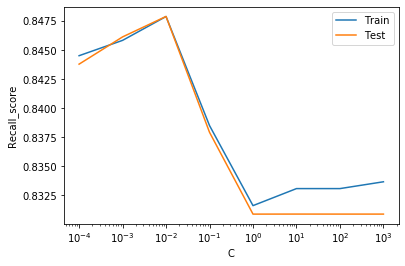

In [167]:
#plotting R2 score vs alpha value
plt.plot(cv_results2['param_C'], cv_results2['mean_train_score'], label='Train')
plt.plot(cv_results2['param_C'], cv_results2['mean_test_score'], label='Test')
plt.xlabel('C')
plt.ylabel('Recall_score')
plt.xscale('log')
plt.legend()
plt.show()

Hence l2 regularization along with C=0.01 should be our hyperparameters of choice.

In [168]:
 #use class_weight=balanced to give equal weightage
logregmodel = LogisticRegression(C=0.01, penalty='l2', class_weight='balanced')  
logregmodel.fit(X_train_rfe, y_train2)

LogisticRegression(C=0.01, class_weight='balanced')

In [169]:
#flatten the logregmodel.coef_ array
coef_list = []
for i in list(logregmodel.coef_):
    for j in i:
        coef_list.append(j)

In [170]:
#build dataframe for features and corresponding coefficients
coef_df = pd.DataFrame({'Variable':list(X_train_rfe.columns),
                       'Coefficient':coef_list})

In [171]:
#displaying the different coefficients, sort by their coefficient values
coef_df.set_index('Variable', inplace=True)
coef_df.sort_values('Coefficient', ascending=True)

,Coefficient
Variable,
loc_ic_mou_8,-1.673297
total_rech_num_8,-1.376947
diff_total_rech_num_,-1.152667
count_rech_2g_8,-1.135242
monthly_2g_8,-1.101831
total_og_mou_8,-1.047856
loc_og_t2m_mou_8,-1.039752
diff_total_og_mou_,-1.037370
av_rech_amt_data_8,-1.032038


We decide the importance of different predictors based on the obtained magnitudes of different coefficients after the application of logistic regression on our dataset.

In [172]:
#get the percentage feature importance based on magnitude of coefficients
coef_df['feature_importance'] = round((coef_df.Coefficient.apply(np.abs) / coef_df.Coefficient.apply(np.abs).sum())*100,1)
coef_df = coef_df.sort_values('feature_importance', ascending=False)
coef_df

,Coefficient,feature_importance
Variable,,
loc_ic_mou_8,-1.673297,13.3
total_rech_num_8,-1.376947,10.9
diff_total_rech_num_,-1.152667,9.2
count_rech_2g_8,-1.135242,9.0
monthly_2g_8,-1.101831,8.8
loc_og_t2m_mou_8,-1.039752,8.3
total_og_mou_8,-1.047856,8.3
av_rech_amt_data_8,-1.032038,8.2
diff_total_og_mou_,-1.037370,8.2


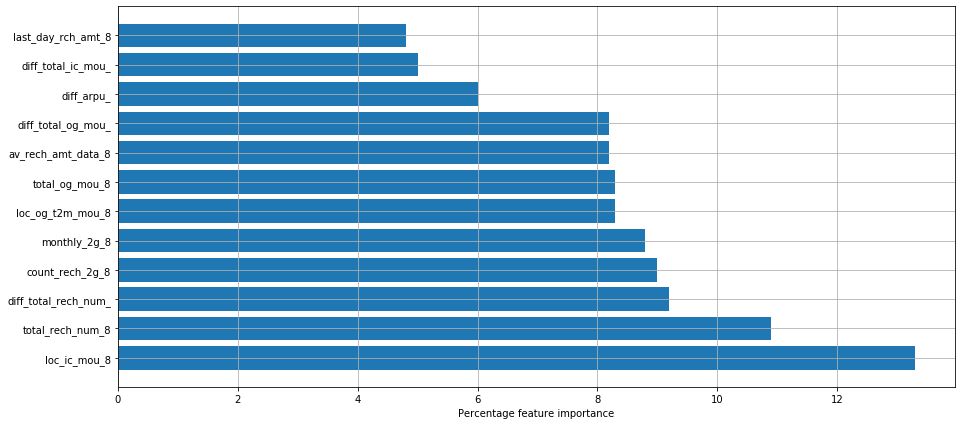

In [173]:
plt.figure(figsize=(15,7))
plt.barh(y=coef_df.index, width=coef_df.feature_importance)
plt.xlabel('Percentage feature importance')
plt.grid()
plt.show()

From the above, we note that the following top features which are influencing the churn most:

1. `loc_ic_mou_8`: Local incoming minutes of usage during action phase i.e. August month.
2. `total_rech_num_8`:	Total no. of recharge done during action phase i.e. August month.
3. `diff_total_rech_num_`:	Difference in total recharge number between action phase and good phase.
4. `count_rech_2g_8`: Count of 2G data recharge during action phase i.e. August month.		
5. `monthly_2g_8`: Monthly 2G services usage during action phase i.e. August month.
6. `loc_og_t2m_mou_8`: Local outgoing t2m minutes of usage during action phase i.e. August month.	
7. `total_og_mou_8`: Total outgoing minutes of usage during action phase i.e. August month.
8. `av_rech_amt_data_8`: Average amount on data recharges done during action phase i.e. August month. 	
9. `diff_total_og_mou_`: Difference in total outgoing minutes of usage between action phase and good phase.
10. `diff_arpu_`: Difference in average revenue per user between action phase and good phase.

## 8. Actionable recommendations:


Following strategies are recommended to manage customer churn:
- Free local incoming and outgoing minutes should be offered during the action phase to the customers whom our ML model-I idetify as churners. It incentives the use of voice services of network by those customers and hence reduce churn rate.
- Those customers with low ARPU during the action phase as compared with the good phase may be given additional benefits.
- Those with low monthly 2G data usage during action phase may be given free data with enhanced speed (if it is permissible), to not make them switch to other network.
- Those customers who have not recharged during the month of action phase can be given additional validity of network with free talktimes.
- Those with large difference in MOU between action phase and good phase may be given freebies, as they have high churn rates.

---------------------------------------------------------------------------------------------------------------------------